# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problemlast_date0)
    * [Bài toán 11](#Problemlast_date1)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:
# !pip install pycountry_convert
# !pip install folium
# !pip install seaborn
# !pip install plotly
!where python

/Users/haininhhoang94/.virtualenvs/funix-data-science-ynpb/bin/python
/Users/haininhhoang94/.pyenv/shims/python


In [2]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc

import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns

plt.style.use("fivethirtyeight")

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
)
deaths_df = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
)
recoveries_df = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
)

In [5]:
# Only taken result up to 04/08/2021 (Vietnamese Calendar format)
confirmed_df = confirmed_df.loc[:, :"8/4/21"]
deaths_df = deaths_df.loc[:, :"8/4/21"]
recoveries_df = recoveries_df.loc[:, :"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [6]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [7]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [8]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

In [9]:
# it's better to check shape
print(confirmed_df.shape)
print(deaths_df.shape)
print(recoveries_df.shape)

(289, 565)
(289, 565)
(274, 565)


In [10]:
# just curious, but seems like the number here is cummulative over time, not record per day
# testing this by seeing if the next day number is greater than the previous day
check_all_positive_dict = {}
for i, df in enumerate([confirmed_df, deaths_df, recoveries_df]):
    df = df.select_dtypes(include="int64")
    shift_df = df.shift(1, axis=1)
    increment = df - shift_df
    increment.dropna(inplace=True, axis=1)
    check_all_positive = (increment > 0).any().any()
    check_all_positive_dict[i] = check_all_positive

check_all_positive_dict

{0: True, 1: True, 2: True}

Như vậy tất cả các cột đều tịnh tiến, do đó số sẽ là số tổng thay vì số report hàng ngày

Hide for later
<!--# Data Analysis Class-->

Hide for later
<!--# TODO: fix this
# Trả lời các câu hỏi bên trên:
class DataAnalysisGeneral:
    def __init__(self, df: np.array) -> None:
        self.df = df

    # - Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
    # After heading the data, the date is stored inside columns.
    def begin_date(self) -> str:
        df = self.df
        cols = pd.Series(df.columns)
        date_ = pd.to_datetime(pd.Series(cols), errors="coerce").dropna()
        date_.sort_values(ascending=True, inplace=True)
        result = date_.head(1).iloc[0]
        print(result)
        pass

    # - Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
    def end_date(self) -> str:
        df = self.df
        cols = pd.Series(df.columns)
        date_ = pd.to_datetime(pd.Series(cols), errors="coerce").dropna()
        date_.sort_values(ascending=False, inplace=True)
        result = date_.head(1).iloc[0]
        print(result)
        pass

    # - Tính tổng số ngày có trong 3 bộ dữ liệu
    # Count total number of date
    def total_number_of_date(self):
        df = self.df
        cols = pd.Series(df.columns)
        date_ = pd.to_datetime(pd.Series(cols), errors="coerce").dropna()
        result = date_.count()
        print(result)
        pass

    # Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
    def duplicated_countries(self):
        df = self.df
        print(df.loc[df["Country/Region"].duplicated()]["Country/Region"].unique())


confirmed_df_DA = DataAnalysisGeneral(confirmed_df)
deaths_df_DA = DataAnalysisGeneral(deaths_df)
recoveries_df_DA = DataAnalysisGeneral(recoveries_df)
-->

Hide for later
<!--# - Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
# After heading the data, the date is stored inside columns.
confirmed_df_DA.begin_date()
deaths_df_DA.begin_date()
recoveries_df_DA.begin_date()-->

Hide for later
<!--confirmed_df_DA.end_date()
deaths_df_DA.end_date()
recoveries_df_DA.end_date()-->

Hide for later
<!--# - xác định có bao nhiêu quốc gia trong dữ liệu này.
# check number of countries in 3 dataframe
np.count_nonzero(
    pd.concat(
        [
            confirmed_df["Country/Region"],
            deaths_df["Country/Region"],
            recoveries_df["Country/Region"],
        ]
    ).unique()
)-->

Hide for later
<!--# - Tính tổng số ngày có trong 3 bộ dữ liệu
# Count total number of date
confirmed_df_DA.total_number_of_date()
deaths_df_DA.total_number_of_date()
recoveries_df_DA.total_number_of_date()-->

Hide for later
<!--# Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
confirmed_df_DA.duplicated_countries()
deaths_df_DA.duplicated_countries()
recoveries_df_DA.duplicated_countries()-->

Hide for later
<!--# - Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
# Từng quốc gia?
# - Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.

# - Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
# - Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
# - Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.
# LATER!-->

#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [11]:
# We need countries as well since the shape of recoveries is different
cols = confirmed_df.drop(columns=["Province/State", "Lat", "Long"]).keys()

# Set index for better Allocate result
confirmed = confirmed_df.loc[:, cols].set_index("Country/Region")
deaths = deaths_df.loc[:, cols].set_index("Country/Region")
recoveries = recoveries_df.loc[:, cols].set_index("Country/Region")
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(
    np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0]
)

last_date = confirmed.columns[-1]

# YOUR CODE: (NOTE: all of this is record cummulative)
# total cases is the sum of all active, deaths, recoveries (this is for everyday have its own record)
total_cases = confirmed.sum()
# total deaths is the sum of deaths alone
total_deaths = deaths.sum()
# mortality rate is the div of deaths vs cases (world wide)
mortality_rate = (total_deaths / total_cases) * 100
# recoveries rate
recovery_rate = (recoveries.sum() / total_cases) * 100
# total recovered
total_recovered = recoveries.sum()
# total_active is the remaining between deaths and recovery
total_active = total_cases - total_recovered - total_deaths

In [12]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print(
    "Total active cases: ",
    total_active[-1],
)

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

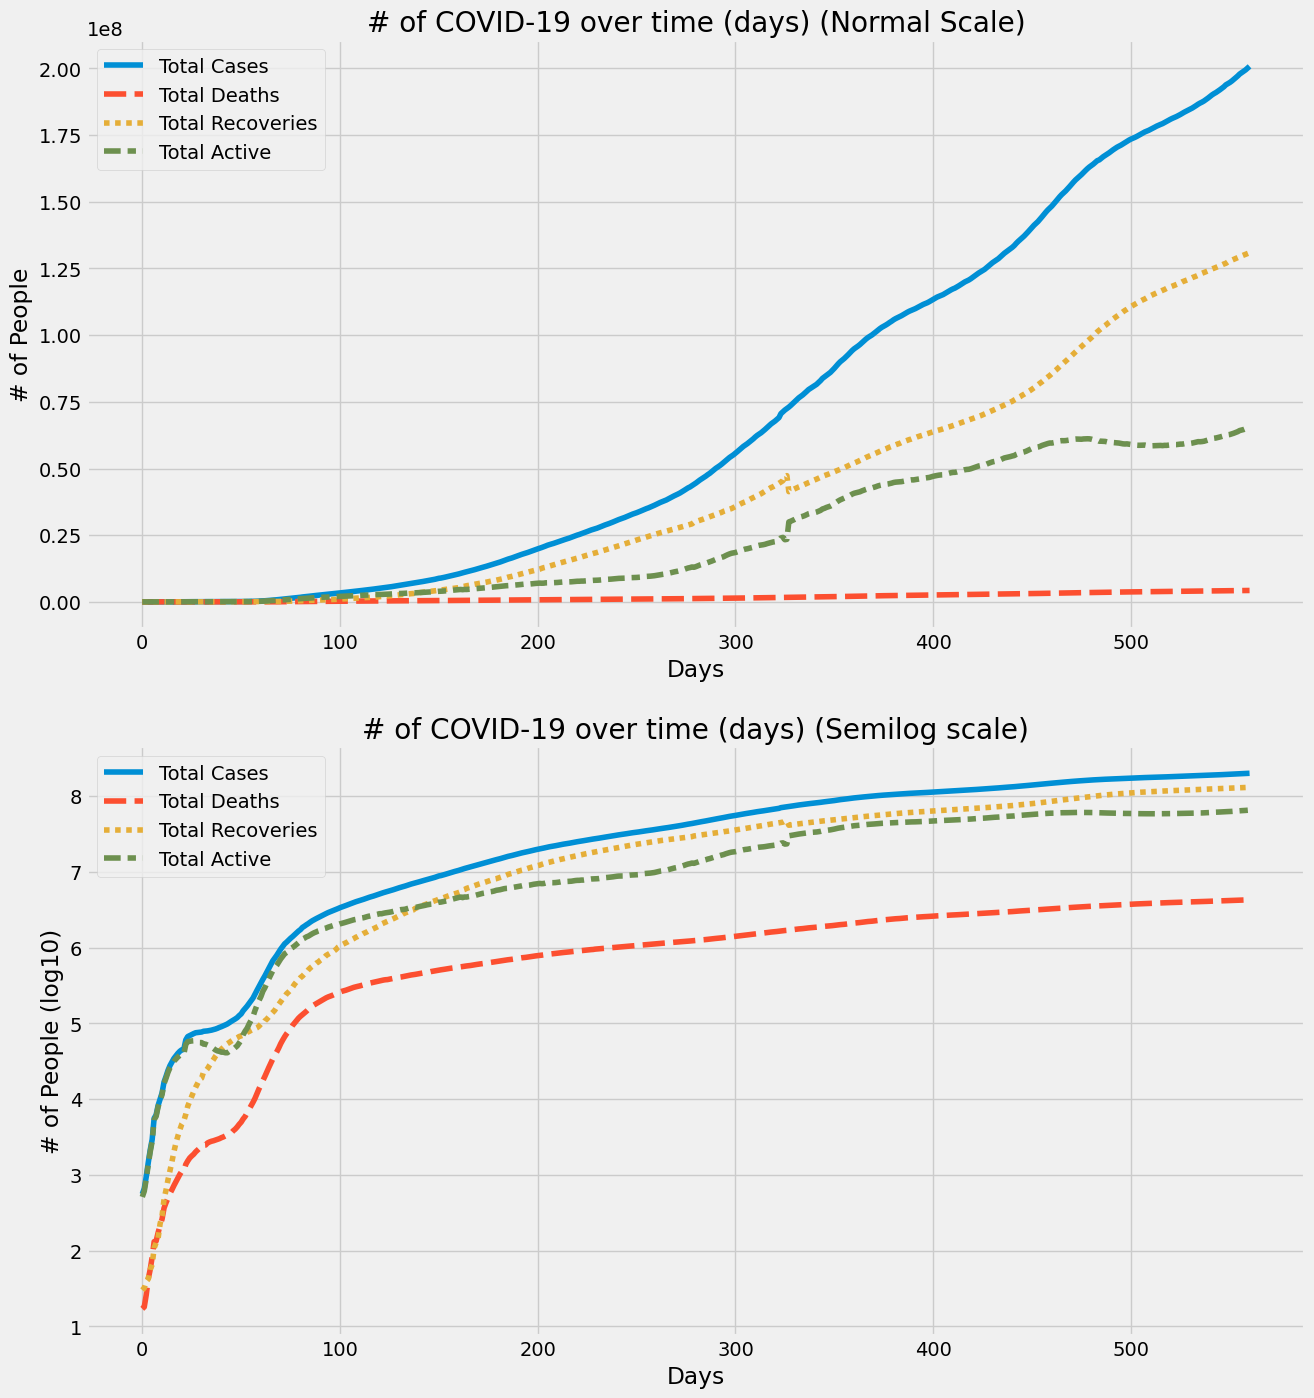

In [13]:
# Create a dataframe that contain 3 total dataset
total_df = pd.DataFrame(
    data={
        "Total Cases": total_cases,
        "Total Deaths": total_deaths,
        "Total Recoveries": total_recovered,
        "Total Active": total_active,
        "Days": adjusted_dates,
    },
).set_index("Days")

# set figsize
plt.figure(figsize=(14, 16))

# loop for both normal scale and semi-log (log of people) plot
types_ = ["Normal Scale", "Semilog scale"]
y_label = ["# of People", "# of People (log10)"]
for i, type_ in enumerate([total_df, np.log10(total_df)]):
    plt.subplot(2, 1, i + 1)
    plt.title("# of COVID-19 over time (days) ({})".format(types_[i]))
    plt.xlabel("Days")
    plt.ylabel(y_label[i])
    sns.lineplot(data=type_)

plt.show()

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

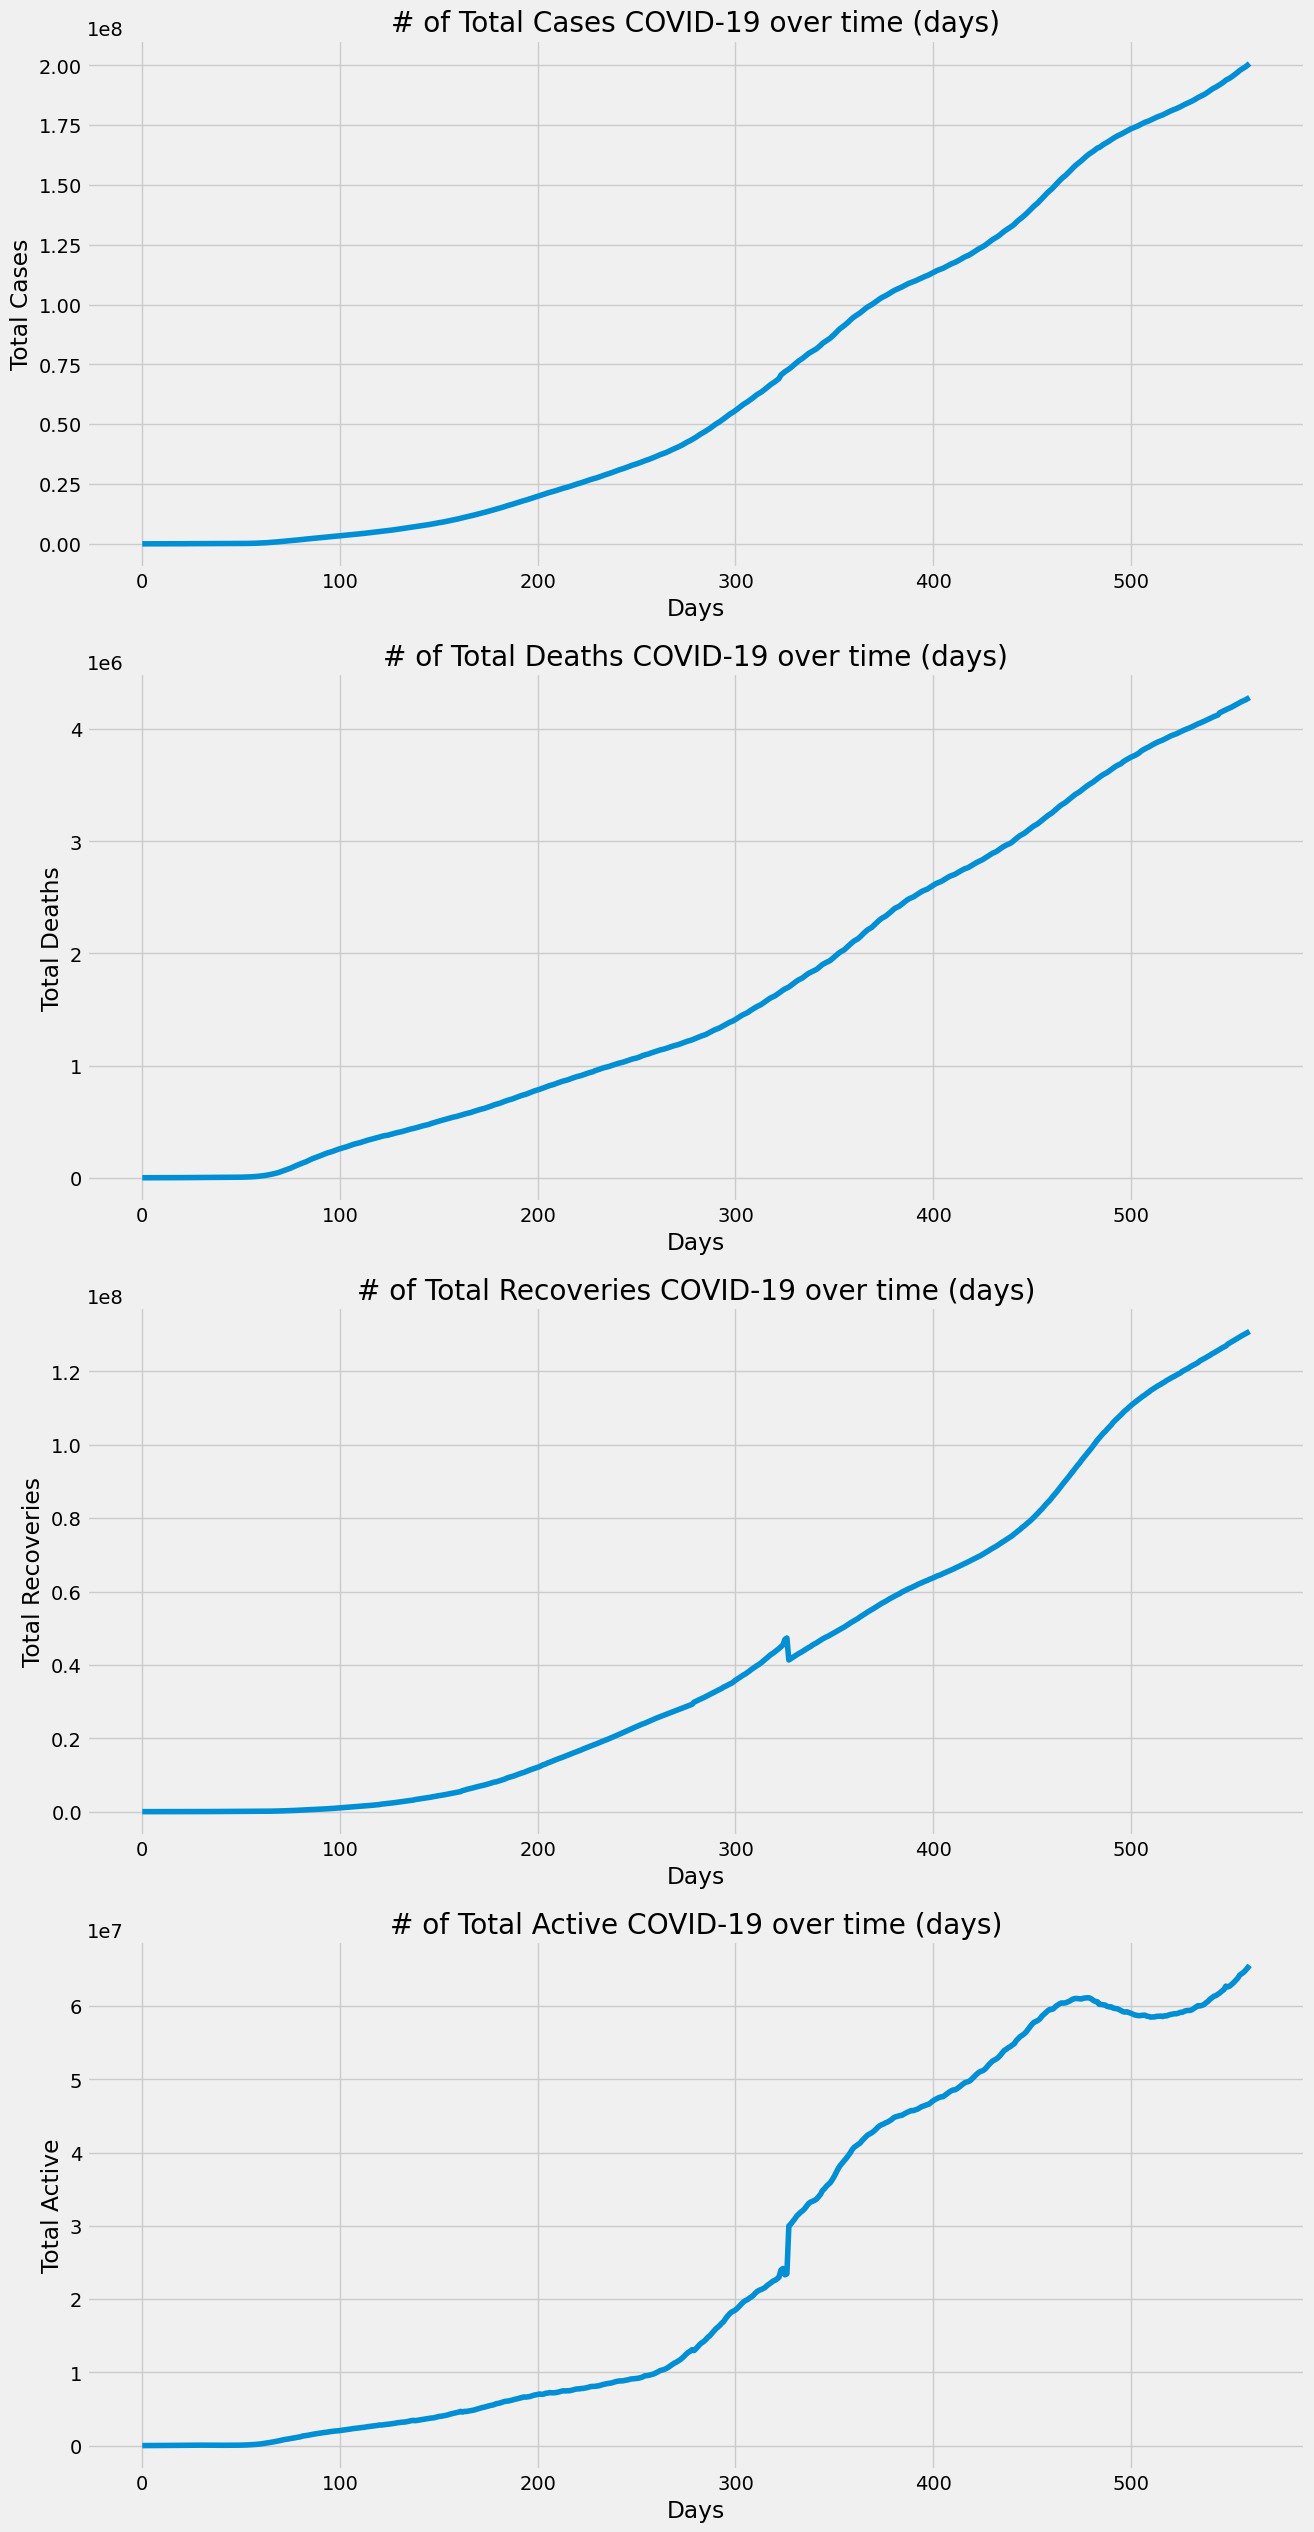

In [14]:
plt.figure(figsize=(14, 30))

# loop similar as above
for i, type_ in enumerate(
    ["Total Cases", "Total Deaths", "Total Recoveries", "Total Active"]
):
    plt.subplot(4, 1, i + 1)
    plt.title("# of {} COVID-19 over time (days)".format(type_))
    sns.lineplot(data=total_df[type_])

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [15]:
# Increment df, with a method that rolling 2 periods and apply increment ([-1] - [0])
def increment(window):
    if len(window) > 1:
        return window.iloc[-1] - window.iloc[0]
    else:
        return np.nan


increment_total_df = total_df.rolling(2).apply(increment)
# Rename cols
increment_total_df.rename(
    columns={
        "Total Cases": "World Daily Increases in Confirmed Cases",
        "Total Deaths": "World Daily Increases in Deaths",
        "Total Recoveries": "World Daily Increases in Recoveries Cases",
        "Total Active": "World Daily Increases in Active Cases",
    },
    inplace=True,
)

# Drop NA as well
increment_total_df.dropna(inplace=True)

increment_total_df.head()

World Daily Increases in Confirmed Cases  \
Days                                             
1                                        100.0   
2                                        287.0   
3                                        493.0   
4                                        683.0   
5                                        809.0   

      World Daily Increases in Deaths  \
Days                                    
1                                 1.0   
2                                 8.0   
3                                16.0   
4                                14.0   
5                                26.0   

      World Daily Increases in Recoveries Cases  \
Days                                              
1                                           2.0   
2                                           7.0   
3                                           3.0   
4                                          14.0   
5                                           9.0   

      World Daily Increases in Active Cases  
Days                                         
1                                      97.0  
2                                     272.0  
3                                     474.0  
4                                     655.0  
5                                     774.0

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

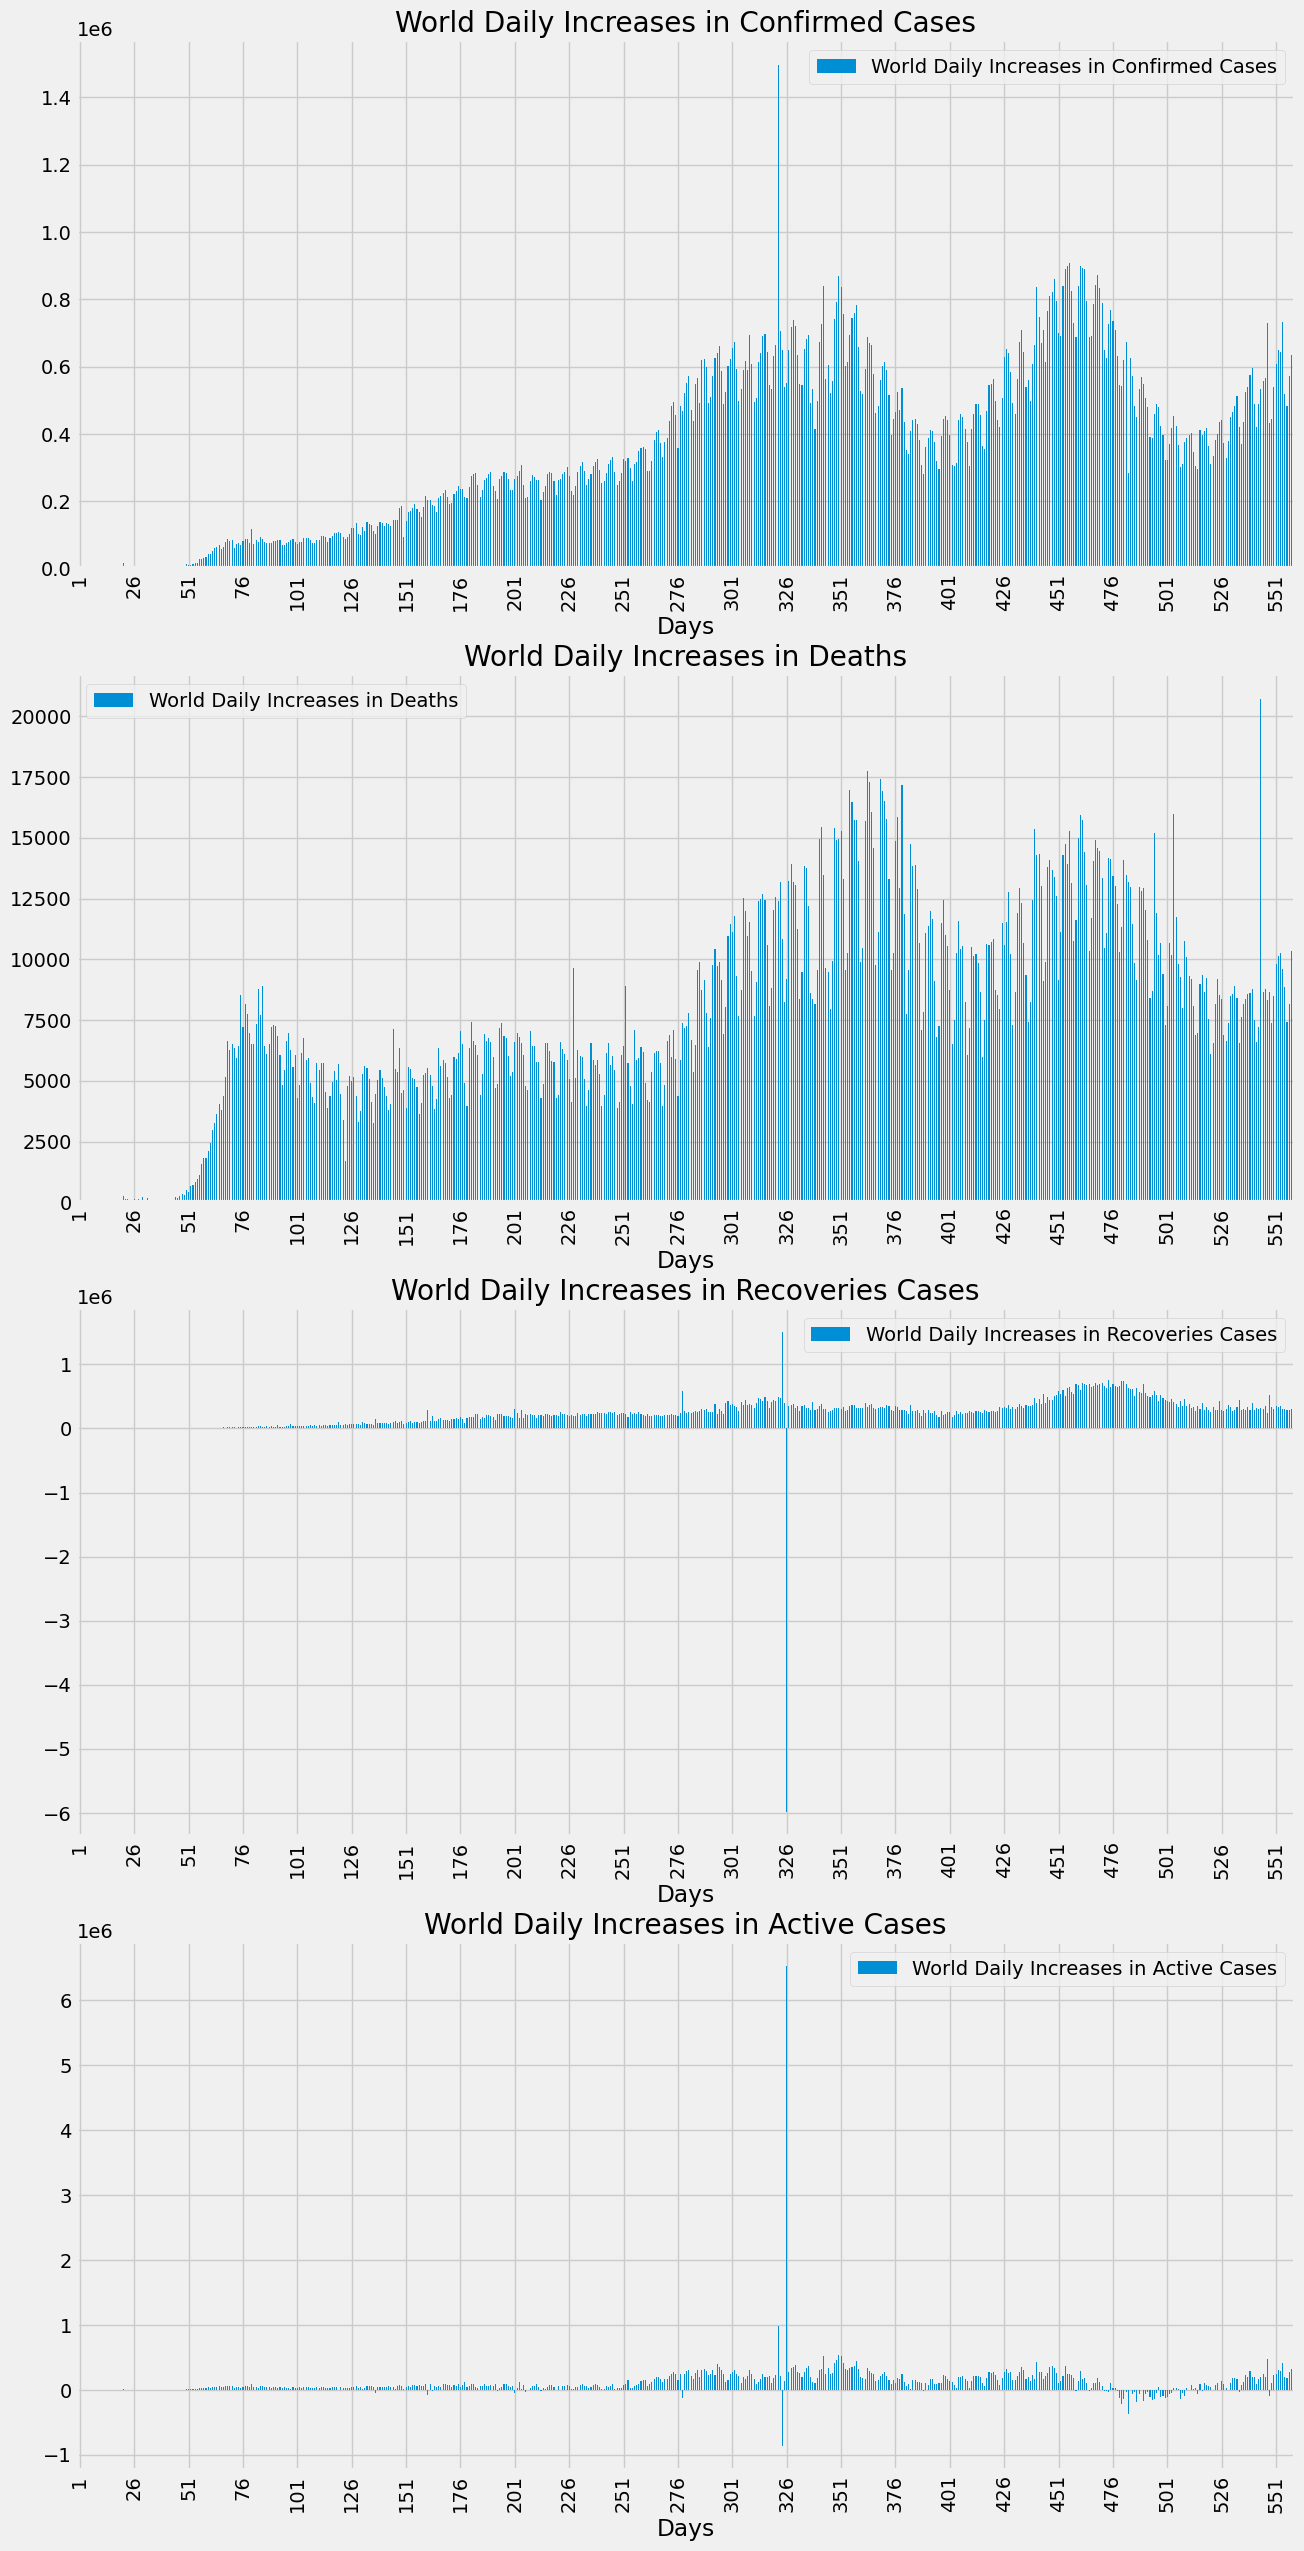

In [16]:
plt.figure(figsize=(14, 30))

# Histogram for each plot. Loop similar as above
for i, col in enumerate(increment_total_df.columns):
    plt.subplot(4, 1, i + 1)
    plt.title(col)
    xticks_ = np.arange(1, len(increment_total_df[col]), 25)
    increment_total_df[col].plot(kind="bar", xticks=xticks_, legend=col)
    plt.xticks(rotation=90)

plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [17]:
# Calculate mortality rate worldwide and recoveries rate worldwide
mortality_rate_df = pd.DataFrame(
    data={
        "Mortality Rate": (total_deaths / total_cases) * 100,
        "Days": adjusted_dates,
    }
).set_index("Days")


recoveries_rate_df = pd.DataFrame(
    data={
        "Recoveries Rate": (total_recovered / total_cases) * 100,
        "Days": adjusted_dates,
    }
).set_index("Days")

recoveries_rate_df.head()

Recoveries Rate
Days                 
0            5.385996
1            4.870624
2            4.131356
3            2.922756
4            2.641509

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

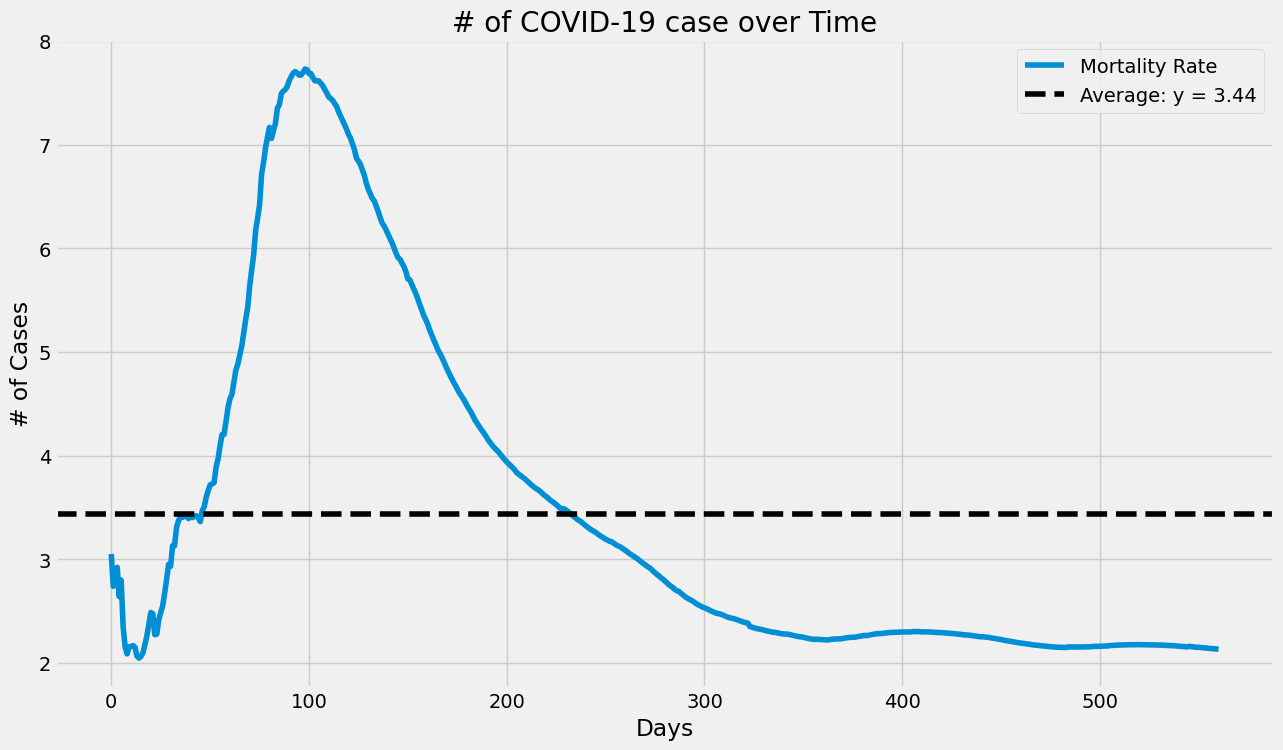

In [18]:
# Visualize Mortality rate by time
plt.figure(figsize=(14, 8))
# plt.plot(kind="line", data=mortality_rate_df)
sns.lineplot(data=mortality_rate_df)
plt.title("# of COVID-19 case over Time")
plt.xlabel("Days")
plt.ylabel("# of Cases")

# plot average line
plt.axhline(
    mortality_rate.mean(),
    color="black",
    linestyle="--",
    label="Average: y = {:.2f}".format(mortality_rate.mean()),
)

plt.legend()

plt.show()

**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

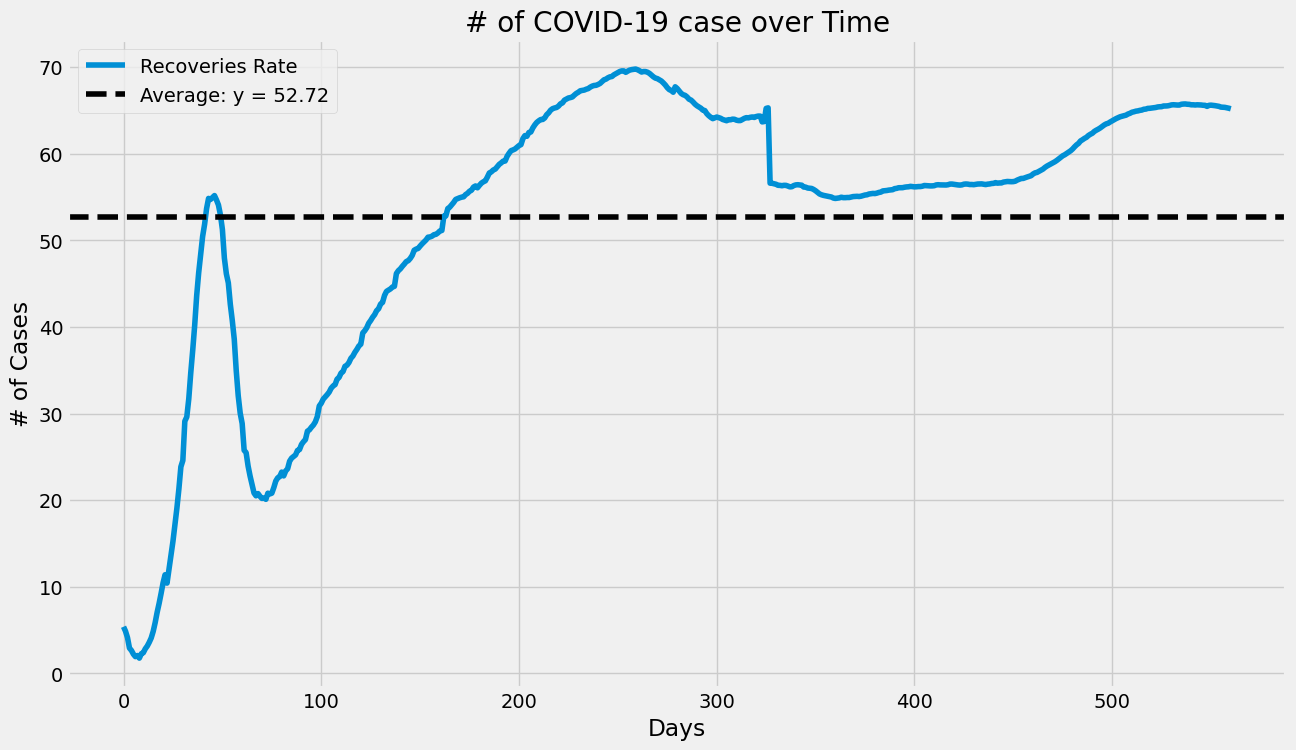

In [19]:
# Visualize Recoveries rate by time
plt.figure(figsize=(14, 8))
# plt.plot(kind="line", data=mortality_rate_df)
sns.lineplot(data=recoveries_rate_df)
plt.title("# of COVID-19 case over Time")
plt.xlabel("Days")
plt.ylabel("# of Cases")

plt.axhline(
    recovery_rate.mean(),
    color="black",
    linestyle="--",
    label="Average: y = {:.2f}".format(recovery_rate.mean()),
)

plt.legend()

plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [20]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[
    confirmed_df["Country/Region"] == "US", "Country/Region"
] = "USA"
deaths_df.loc[deaths_df["Country/Region"] == "US", "Country/Region"] = "USA"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "US", "Country/Region"
] = "USA"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Korea, South", "Country/Region"
] = "South Korea"
deaths_df.loc[
    deaths_df["Country/Region"] == "Korea, South", "Country/Region"
] = "South Korea"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Korea, South", "Country/Region"
] = "South Korea"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Taiwan*", "Country/Region"
] = "Taiwan"
deaths_df.loc[
    deaths_df["Country/Region"] == "Taiwan*", "Country/Region"
] = "Taiwan"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Taiwan*", "Country/Region"
] = "Taiwan"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Congo (Kinshasa)", "Country/Region"
] = "Democratic Republic of the Congo"
deaths_df.loc[
    deaths_df["Country/Region"] == "Congo (Kinshasa)", "Country/Region"
] = "Democratic Republic of the Congo"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Congo (Kinshasa)", "Country/Region"
] = "Democratic Republic of the Congo"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Cote d'Ivoire", "Country/Region"
] = "Côte d'Ivoire"
deaths_df.loc[
    deaths_df["Country/Region"] == "Cote d'Ivoire", "Country/Region"
] = "Côte d'Ivoire"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Cote d'Ivoire", "Country/Region"
] = "Côte d'Ivoire"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Reunion", "Country/Region"
] = "Réunion"
deaths_df.loc[
    deaths_df["Country/Region"] == "Reunion", "Country/Region"
] = "Réunion"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Reunion", "Country/Region"
] = "Réunion"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Congo (Brazzaville)", "Country/Region"
] = "Republic of the Congo"
deaths_df.loc[
    deaths_df["Country/Region"] == "Congo (Brazzaville)", "Country/Region"
] = "Republic of the Congo"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Congo (Brazzaville)", "Country/Region"
] = "Republic of the Congo"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Bahamas, The", "Country/Region"
] = "Bahamas"
deaths_df.loc[
    deaths_df["Country/Region"] == "Bahamas, The", "Country/Region"
] = "Bahamas"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Bahamas, The", "Country/Region"
] = "Bahamas"

confirmed_df.loc[
    confirmed_df["Country/Region"] == "Gambia, The", "Country/Region"
] = "Gambia"
deaths_df.loc[
    deaths_df["Country/Region"] == "Gambia, The", "Country/Region"
] = "Gambia"
recoveries_df.loc[
    recoveries_df["Country/Region"] == "Gambia, The", "Country/Region"
] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    "NA": "North America",
    "SA": "South America",
    "AS": "Asia",
    "OC": "Australia",
    "AF": "Africa",
    "EU": "Europe",
    "na": "Others",
}


# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(
            pc.country_name_to_country_alpha2(country)
        )
    except:
        return "na"


def country_to_continent(country):
    code = country_to_continent_code(country)
    return continents[code]

In [22]:
# testing country code function
country_to_continent("Vietnam")

'Asia'

# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [23]:
# try-except for catching error when insert duplicated
for df in (confirmed_df, deaths_df, recoveries_df):
    try:
        df.insert(
            2, "continent", df["Country/Region"].apply(country_to_continent)
        )
    except ValueError:
        continue
# why the hell when enumerate it does not change our variable? does it mean enumerate create another variable duplication?

confirmed_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 566 columns]

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [25]:
# Calculate gb_total_df_country, gb_deaths_df_country, gb_recoveries_df_country, gb_active_df_country
# Groupby by Country
gb_cache = []
for i, df in enumerate([confirmed_df, deaths_df, recoveries_df]):
    index_ = "Country/Region"
    df_cache = df.set_index(index_)
    df = df.groupby(index_).sum()
    df.drop(
        columns=["continent", "Province/State", "Lat", "Long"], inplace=True
    )
    gb_cache.append(df)

# not inside loop for better variable definition
gb_total_df_country = gb_cache[0]
gb_deaths_df_country = gb_cache[1]
gb_recoveries_df_country = gb_cache[2]

gb_active_df_country = (
    gb_total_df_country - gb_deaths_df_country - gb_recoveries_df_country
)
gb_total_df_country.iloc[:, -1]

Country/Region
Afghanistan             148933
Albania                 133310
Algeria                 176724
Andorra                  14797
Angola                   43158
                         ...  
West Bank and Gaza      317404
Winter Olympics 2022         0
Yemen                     7096
Zambia                  197791
Zimbabwe                113526
Name: 8/4/21, Length: 201, dtype: int64

In [26]:
gb_deaths_df_country.loc["USA"][-1]

611222

In [27]:
# making country_df
country_df = pd.DataFrame(
    data={
        "Country/Region": confirmed_df["Country/Region"].unique(),
        "continent": pd.Series(confirmed_df["Country/Region"].unique()).apply(
            country_to_continent
        ),
    }
).set_index("Country/Region")
col_name = ["Confirmed", "Deaths", "Recoveries", "Active", "Mortality Rate"]
for i, series_ in enumerate(
    [
        gb_total_df_country,
        gb_deaths_df_country,
        gb_recoveries_df_country,
        gb_active_df_country,
    ]
):
    country_df[col_name[i]] = series_.iloc[:, -1]

country_df["Mortality Rate"] = round(
    (country_df["Deaths"] / country_df["Confirmed"]) * 100, 2
)

country_df.head()

continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                    
Afghanistan         Asia     148933    6836       82586   59511   
Albania           Europe     133310    2457      130314     539   
Algeria           Africa     176724    4404      118409   53911   
Andorra           Europe      14797     128       14380     289   
Angola            Africa      43158    1026       39582    2550   

                Mortality Rate  
Country/Region                  
Afghanistan               4.59  
Albania                   1.84  
Algeria                   2.49  
Andorra                   0.87  
Angola                    2.38

Testing USA
<!--gb_recoveries_df_country.loc["USA"]-->

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [29]:
# Calculate gb_total_df_continent, gb_deaths_df_continent, gb_recoveries_df_continent, gb_active_df_continent
# Similar with country_df
gb_cache = []
for i, df in enumerate([confirmed_df, deaths_df, recoveries_df]):
    index_ = "continent"
    df = df.groupby(index_).sum()
    df.drop(
        columns=["Country/Region", "Province/State", "Lat", "Long"],
        inplace=True,
    )
    gb_cache.append(df)

gb_total_df_continent = gb_cache[0]
gb_deaths_df_continent = gb_cache[1]
gb_recoveries_df_continent = gb_cache[2]

gb_active_df_continent = (
    gb_total_df_continent - gb_deaths_df_continent - gb_recoveries_df_continent
)
gb_total_df_continent.iloc[:, -1]

continent
Africa            6855602
Asia             62536726
Australia           90000
Europe           52448545
North America    42351963
Others             753558
South America    35722194
Name: 8/4/21, dtype: int64

In [30]:
# Similar in country
continental_df = pd.DataFrame(
    data={"continent": confirmed_df["continent"].unique()}
).set_index("continent")
col_name = ["Confirmed", "Deaths", "Recoveries", "Active", "Mortality Rate"]
for i, series_ in enumerate(
    [
        gb_total_df_continent,
        gb_deaths_df_continent,
        gb_recoveries_df_continent,
        gb_active_df_continent,
    ]
):
    continental_df[col_name[i]] = series_.iloc[:, -1]

continental_df["Mortality Rate"] = round(
    (continental_df["Deaths"] / continental_df["Confirmed"]) * 100, 2
)

continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Asia            62536726   902952    57853343   3780431            1.44
Europe          52448545  1167140    27947075  23334330            2.23
Africa           6855602   174000     5955131    726471            2.54
Others            753558    16614      654615     82329            2.20
North America   42351963   924518     5776939  35650506            2.18
South America   35722194  1096367    32656668   1969159            3.07
Australia          90000     1425       55290     33285            1.58

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

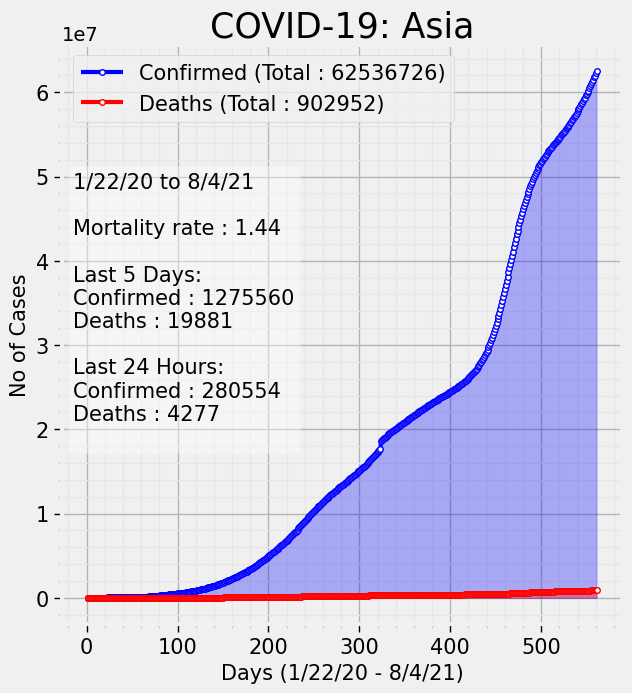

In [31]:
def plot_params(
    ax,
    axis_label=None,
    plt_title=None,
    label_size=15,
    axis_fsize=15,
    title_fsize=20,
    scale="linear",
):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which="both", width=1, labelsize=label_size)
    ax.tick_params(which="major", length=6)
    ax.tick_params(which="minor", length=3, color="0.8")

    # Grid
    plt.grid(lw=1, ls="-", c="0.7", which="major")
    plt.grid(lw=1, ls="-", c="0.9", which="minor")

    # Plot Title
    plt.title(plt_title, {"fontsize": title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0], fontsize=axis_fsize)
    yl = plt.ylabel(axis_label[1], fontsize=axis_fsize)


def visualize_covid_cases(
    confirmed,
    deaths,
    continent=None,
    country=None,
    state=None,
    period=None,
    figure=None,
    scale="linear",
):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10, 10))
        # Sub plot
        ax = f.add_subplot(111)
    else:
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1], figure[2], figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent", continent]
    elif country != None:
        params = ["country", country]
    else:
        params = ["All", "All"]
    color = ["blue", "red", "green"]
    marker_style = dict(
        linewidth=3,
        linestyle="-",
        marker="o",
        markersize=4,
        markerfacecolor="#ffffff",
    )
    for i, stat in enumerate(stats):
        if params[1] == "All":
            # NOTE: change this from 5 to 1, since in our work, we already drop Province
            # Lat Long ...
            cases = np.sum(np.asarray(stat.iloc[:, 1:]), axis=0)[x:]
        else:
            cases = np.sum(
                # NOTE: This code need some modification if I use it without reset_index below
                # NOTE: change this from 5 to 1, since in our work, we already drop Province
                # Lat Long ...
                np.asarray(stat[stat[params[0]] == params[1]].iloc[:, 1:]),
                # np.asarray(stat.loc[params[1]].iloc[:, 1:]),
                axis=0,
            )[x:]
        date = np.arange(1, cases.shape[0] + 1)[x:]
        plt.plot(
            date,
            cases,
            label=label[i] + " (Total : " + str(cases[-1]) + ")",
            color=color[i],
            **marker_style
        )
        plt.fill_between(date, cases, color=color[i], alpha=0.3)
    if params[1] == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 1:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 1:]), axis=0)[x:]
    else:
        Total_confirmed = np.sum(
            np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]
        Total_deaths = np.sum(
            np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]

    text = stats[0].columns[1] + " to " + stats[0].columns[-1] + "\n"
    text += (
        "\nMortality rate : "
        + str(int(Total_deaths[-1] / (Total_confirmed[-1]) * 10000) / 100)
        + "\n"
    )
    text += "\nLast 5 Days:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6]) + "\n"
    text += "\nLast 24 Hours:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2]) + "\n"

    plt.text(
        0.02,
        0.78,
        text,
        fontsize=15,
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.4),
    )

    # Plot Axes Labels
    axis_label = [
        "Days ("
        + confirmed_df.columns[5]
        + " - "
        + confirmed_df.columns[-1]
        + ")",
        "No of Cases",
    ]

    # Plot Parameters
    plot_params(ax, axis_label, scale=scale)

    # Plot Title
    if params[1] == "All":
        plt.title("COVID-19 Cases World", {"fontsize": 25})
    else:
        plt.title("COVID-19: " + params[1], {"fontsize": 25})

    # Legend Location
    l = plt.legend(loc="best", fontsize=15)

    if figure == None:
        plt.show()


# NOTE:
# since in my code, i used continent and country as index for groupby object for
# better merging those together in country_df and continent_df
# so in this case, i need to use reset_index()
# Test the function
visualize_covid_cases(
    confirmed=gb_total_df_continent.reset_index(),
    deaths=gb_deaths_df_continent.reset_index(),
    continent="Asia",
)


# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

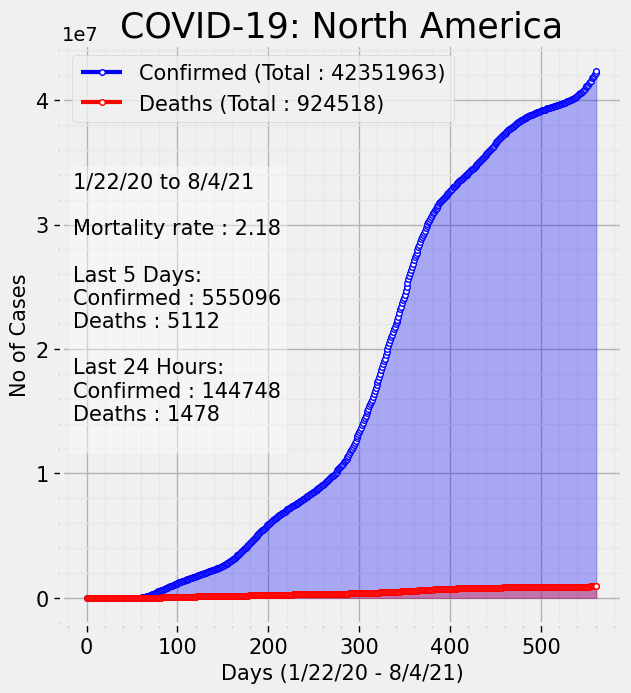

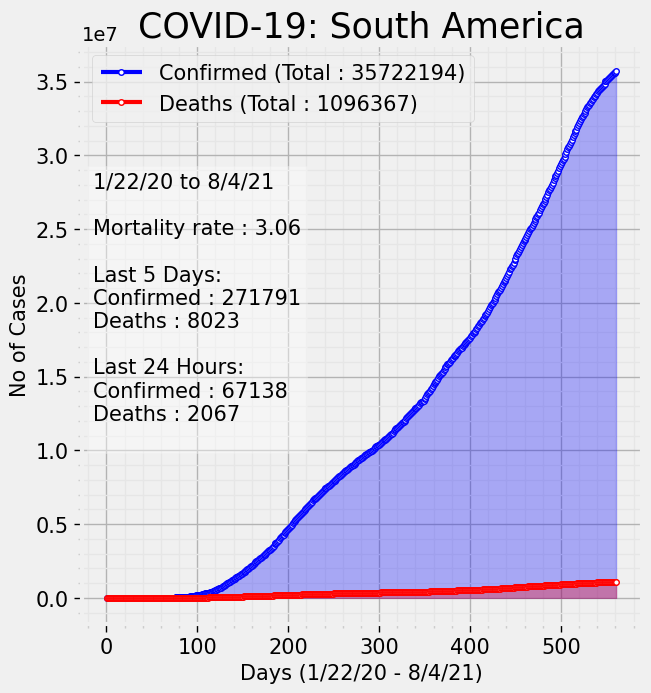

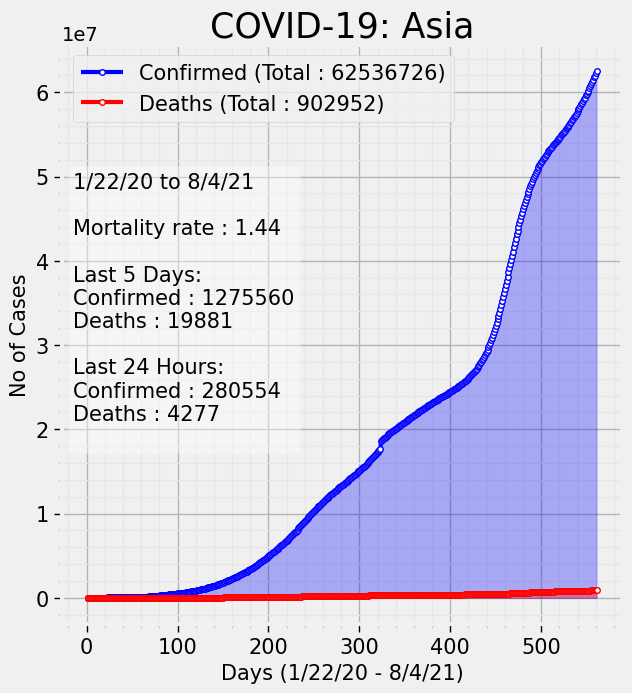

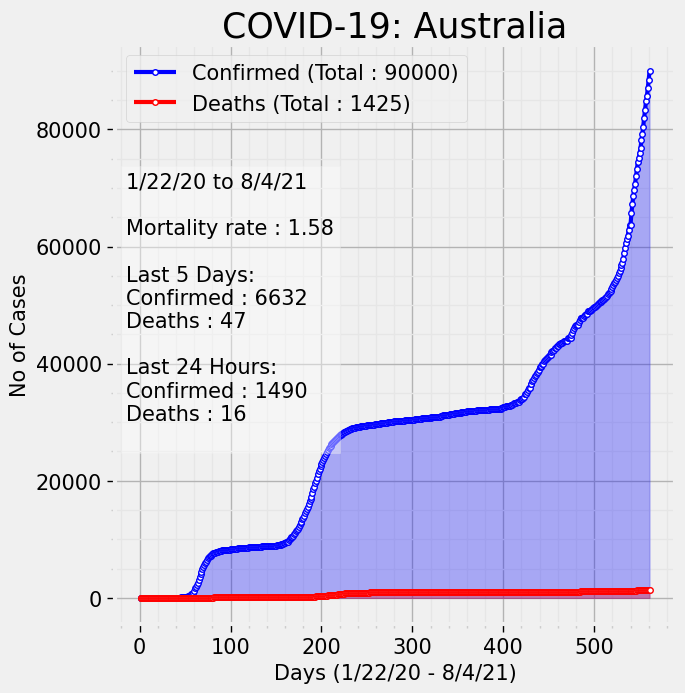

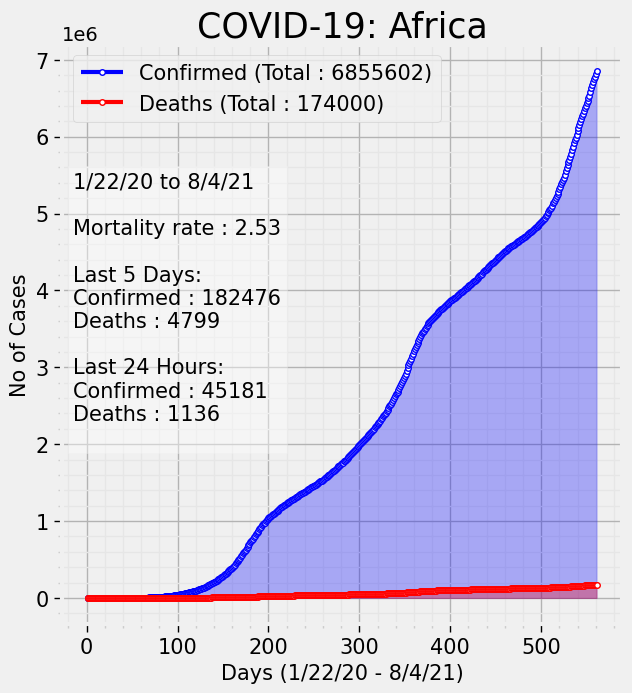

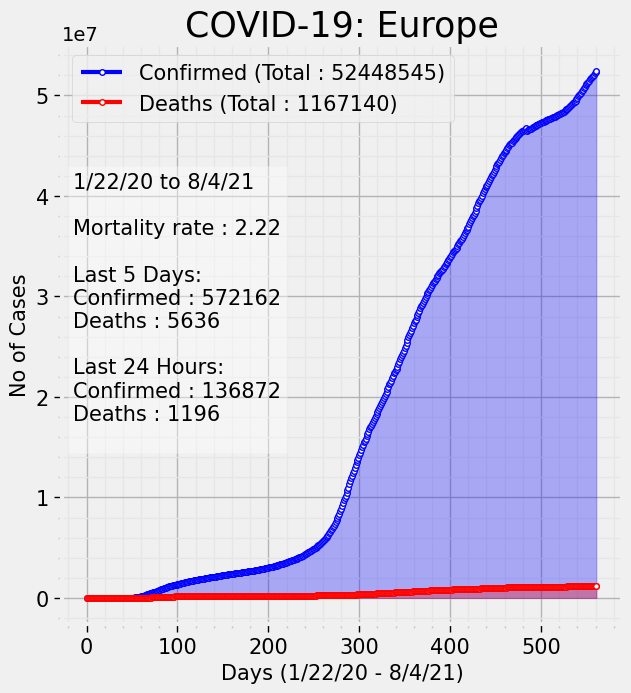

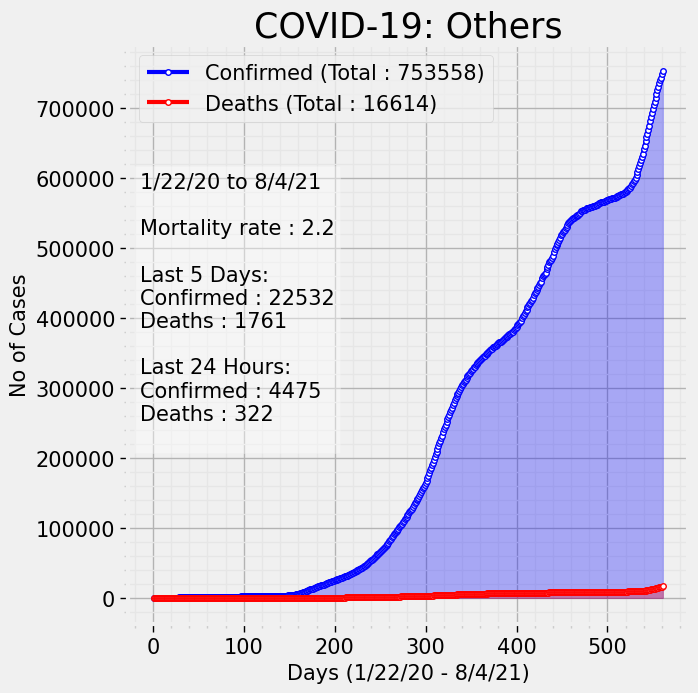

In [33]:
# Using loop to apply function
for cont in continents.values():
    visualize_covid_cases(
        confirmed=gb_total_df_continent.reset_index(),
        deaths=gb_deaths_df_continent.reset_index(),
        continent=cont,
    )


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

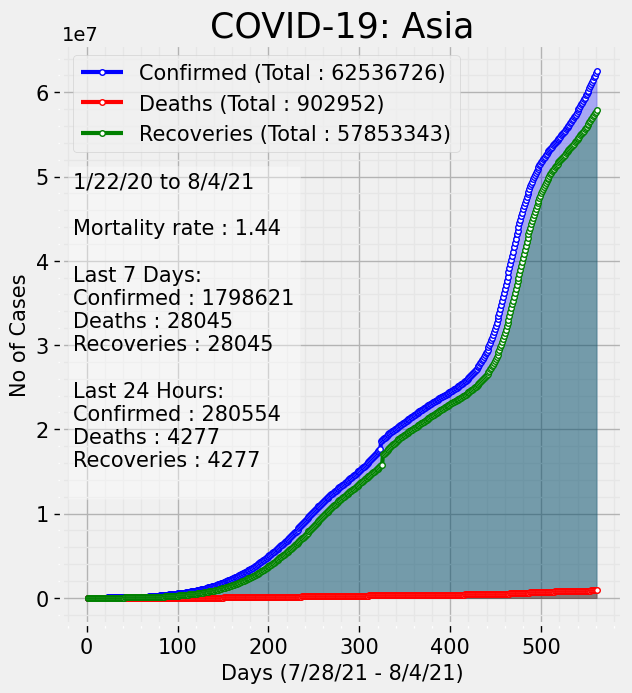

In [34]:
def plot_params(
    ax,
    axis_label=None,
    plt_title=None,
    label_size=15,
    axis_fsize=15,
    # NOTE: sua plotparam chu yeu de lay diem. Tang size tu 20 len 30
    title_fsize=30,
    scale="linear",
):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which="both", width=1, labelsize=label_size)
    ax.tick_params(which="major", length=6)
    # NOTE: sua plotparam chu yeu de lay diem
    ax.tick_params(which="minor", length=3, color="1")

    # Grid
    plt.grid(lw=1, ls="-", c="0.7", which="major")
    plt.grid(lw=1, ls="-", c="0.9", which="minor")

    # Plot Title
    plt.title(plt_title, {"fontsize": title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0], fontsize=axis_fsize)
    yl = plt.ylabel(axis_label[1], fontsize=axis_fsize)


def visualize_covid_cases(
    confirmed,
    deaths,
    recoveries,
    continent=None,
    country=None,
    state=None,
    period=None,
    figure=None,
    scale="linear",
):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10, 10))
        # Sub plot
        ax = f.add_subplot(111)
    else:
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1], figure[2], figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent", continent]
    elif country != None:
        params = ["country", country]
    else:
        params = ["All", "All"]
    color = ["blue", "red", "green"]
    marker_style = dict(
        linewidth=3,
        linestyle="-",
        marker="o",
        markersize=4,
        markerfacecolor="#ffffff",
    )
    for i, stat in enumerate(stats):
        if params[1] == "All":
            # NOTE: change this from 5 to 1, since in our work, we already drop Province
            # Lat Long ...
            cases = np.sum(np.asarray(stat.iloc[:, 1:]), axis=0)[x:]
        else:
            cases = np.sum(
                # NOTE: This code need some modification if I use it without reset_index below
                # NOTE: change this from 5 to 1, since in our work, we already drop Province
                # Lat Long ...
                np.asarray(stat[stat[params[0]] == params[1]].iloc[:, 1:]),
                # np.asarray(stat.loc[params[1]].iloc[:, 1:]),
                axis=0,
            )[x:]
        date = np.arange(1, cases.shape[0] + 1)[x:]
        plt.plot(
            date,
            cases,
            label=label[i] + " (Total : " + str(cases[-1]) + ")",
            color=color[i],
            **marker_style
        )
        plt.fill_between(date, cases, color=color[i], alpha=0.3)
    if params[1] == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 1:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 1:]), axis=0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:, 1:]), axis=0)[x:]
    else:
        Total_confirmed = np.sum(
            np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]
        Total_deaths = np.sum(
            np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]
        Total_recoveries = np.sum(
            np.asarray(stats[1][stats[2][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]

    text = stats[0].columns[1] + " to " + stats[0].columns[-1] + "\n"
    text += (
        "\nMortality rate : "
        + str(int(Total_deaths[-1] / (Total_confirmed[-1]) * 10000) / 100)
        + "\n"
    )
    text += "\nLast 7 Days:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8]) + "\n"
    text += (
        "Recoveries : "
        + str(Total_recoveries[-1] - Total_recoveries[-8])
        + "\n"
    )
    text += "\nLast 24 Hours:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2]) + "\n"
    text += (
        "Recoveries : "
        + str(Total_recoveries[-1] - Total_recoveries[-2])
        + "\n"
    )

    plt.text(
        0.02,
        0.78,
        text,
        fontsize=15,
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.4),
    )

    # Plot Axes Labels
    axis_label = [
        "Days ("
        + confirmed_df.columns[-8]
        + " - "
        + confirmed_df.columns[-1]
        + ")",
        "No of Cases",
    ]

    # Plot Parameters
    plot_params(ax, axis_label, scale=scale)

    # Plot Title
    if params[1] == "All":
        plt.title("COVID-19 Cases World", {"fontsize": 25})
    else:
        plt.title("COVID-19: " + params[1], {"fontsize": 25})

    # Legend Location
    l = plt.legend(loc="best", fontsize=15)

    if figure == None:
        plt.show()


# NOTE:
# since in my code, i used continent and country as index for groupby object for
# better merging those together in country_df and continent_df
# so in this case, i need to use reset_index()
# Test the function
visualize_covid_cases(
    confirmed=gb_total_df_continent.reset_index(),
    deaths=gb_deaths_df_continent.reset_index(),
    recoveries=gb_recoveries_df_continent.reset_index(),
    continent="Asia",
)

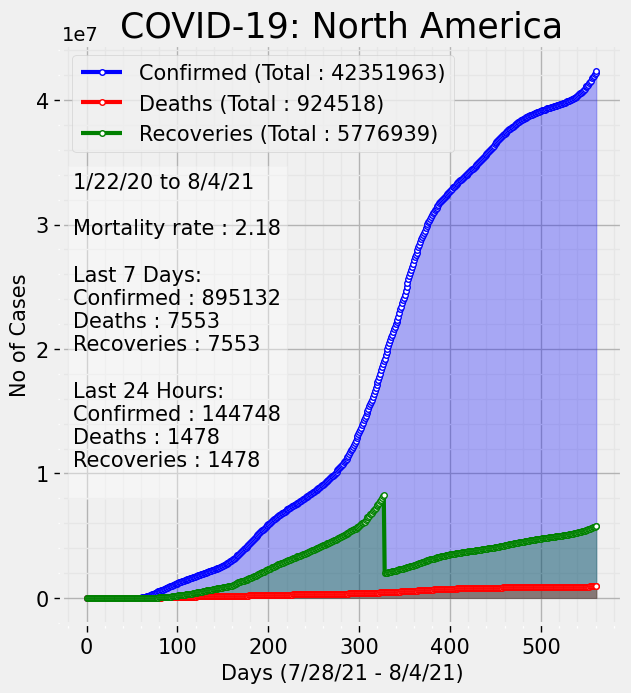

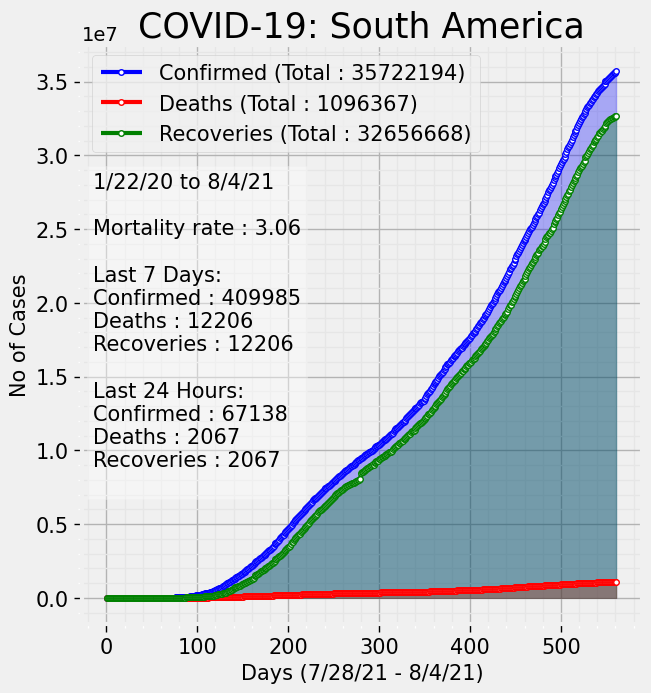

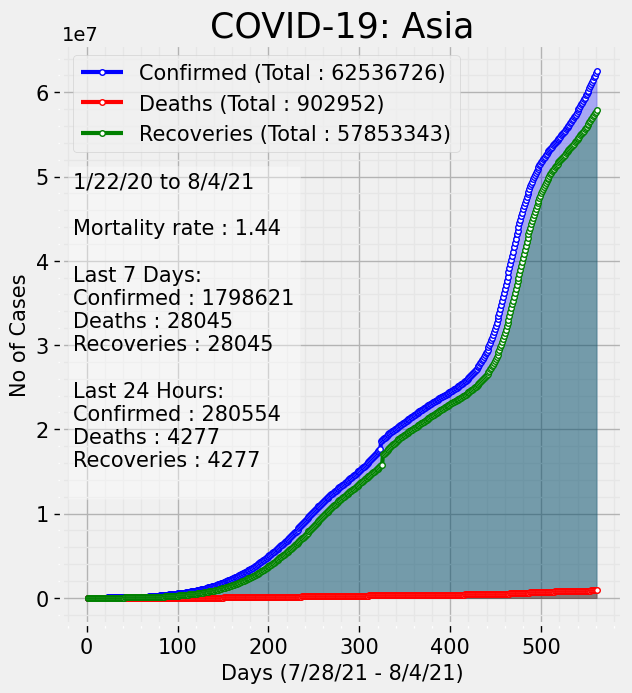

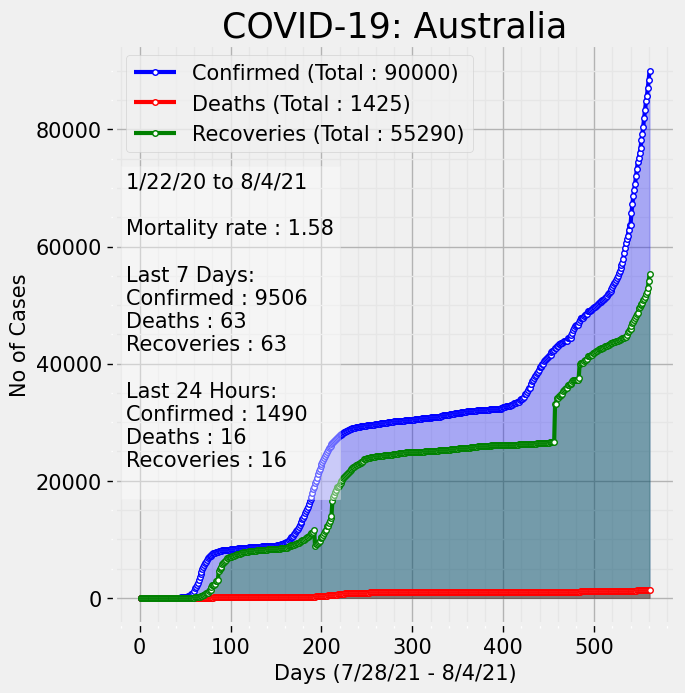

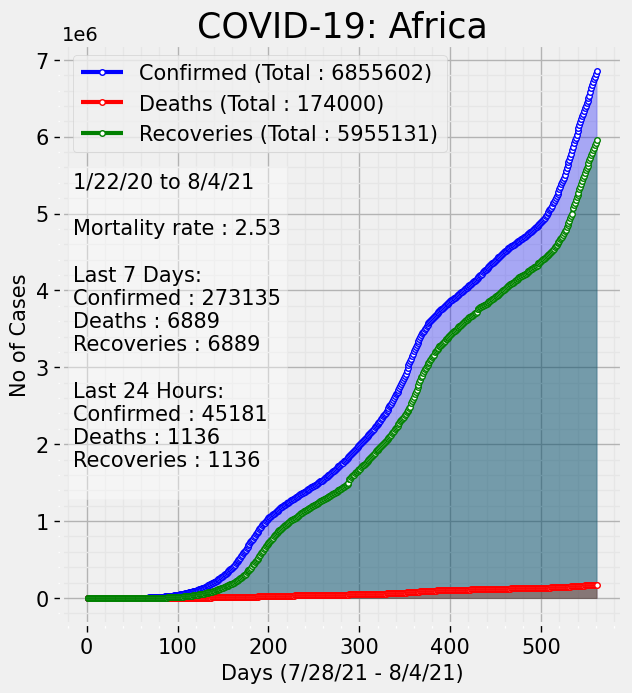

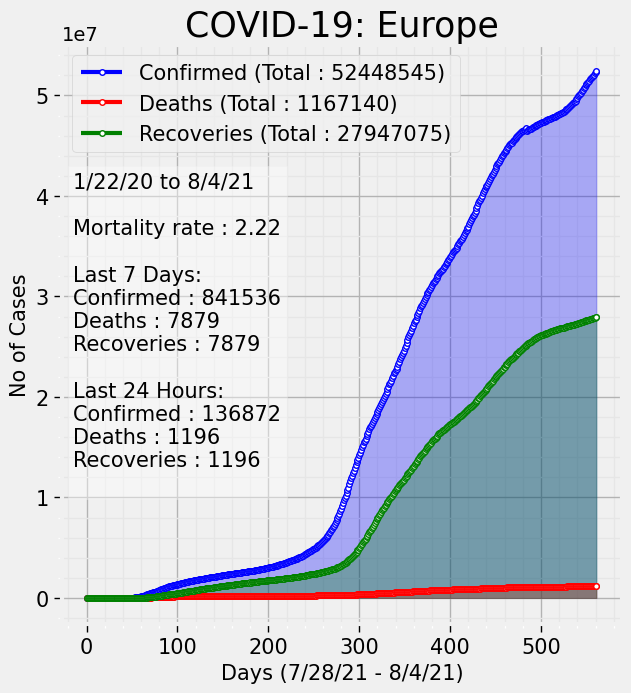

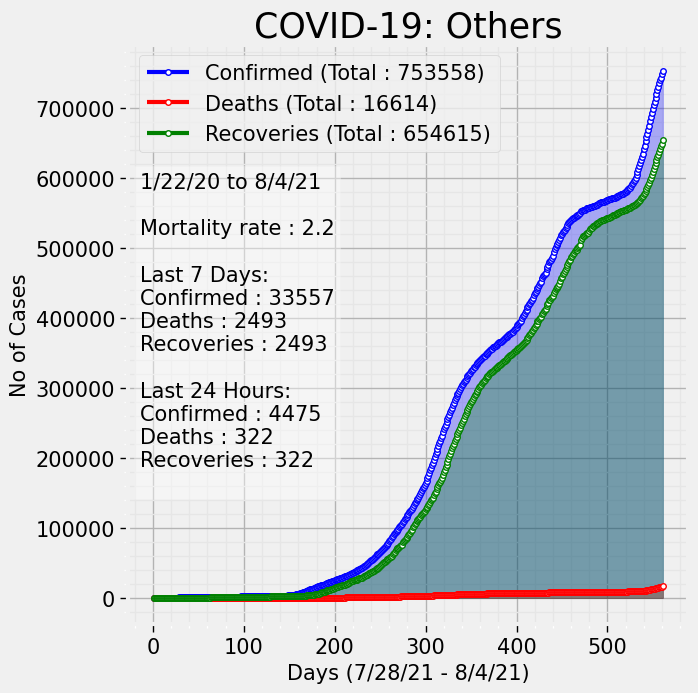

In [35]:
for cont in continents.values():
    visualize_covid_cases(
        confirmed=gb_total_df_continent.reset_index(),
        deaths=gb_deaths_df_continent.reset_index(),
        recoveries=gb_recoveries_df_continent.reset_index(),
        continent=cont,
    )

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

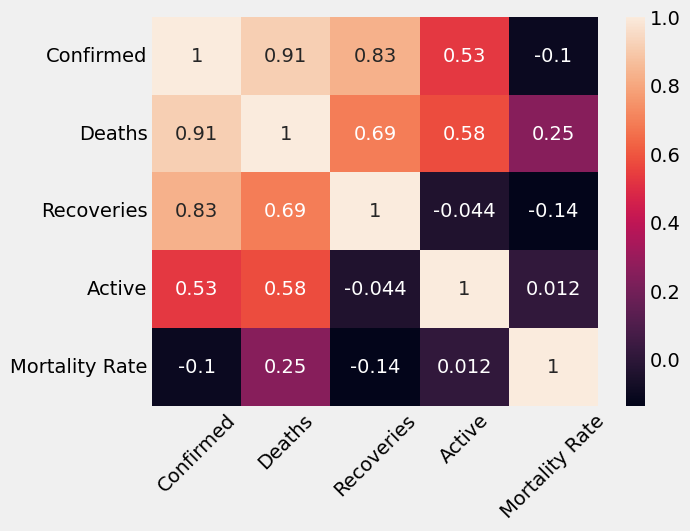

In [36]:
# draw the correlation matrix (by .corr) by heatmap example
sns.heatmap(data=continental_df.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

In [37]:
for i, cont in enumerate(continental_df.columns.values):
    print(i, cont)

0 Confirmed
1 Deaths
2 Recoveries
3 Active
4 Mortality Rate


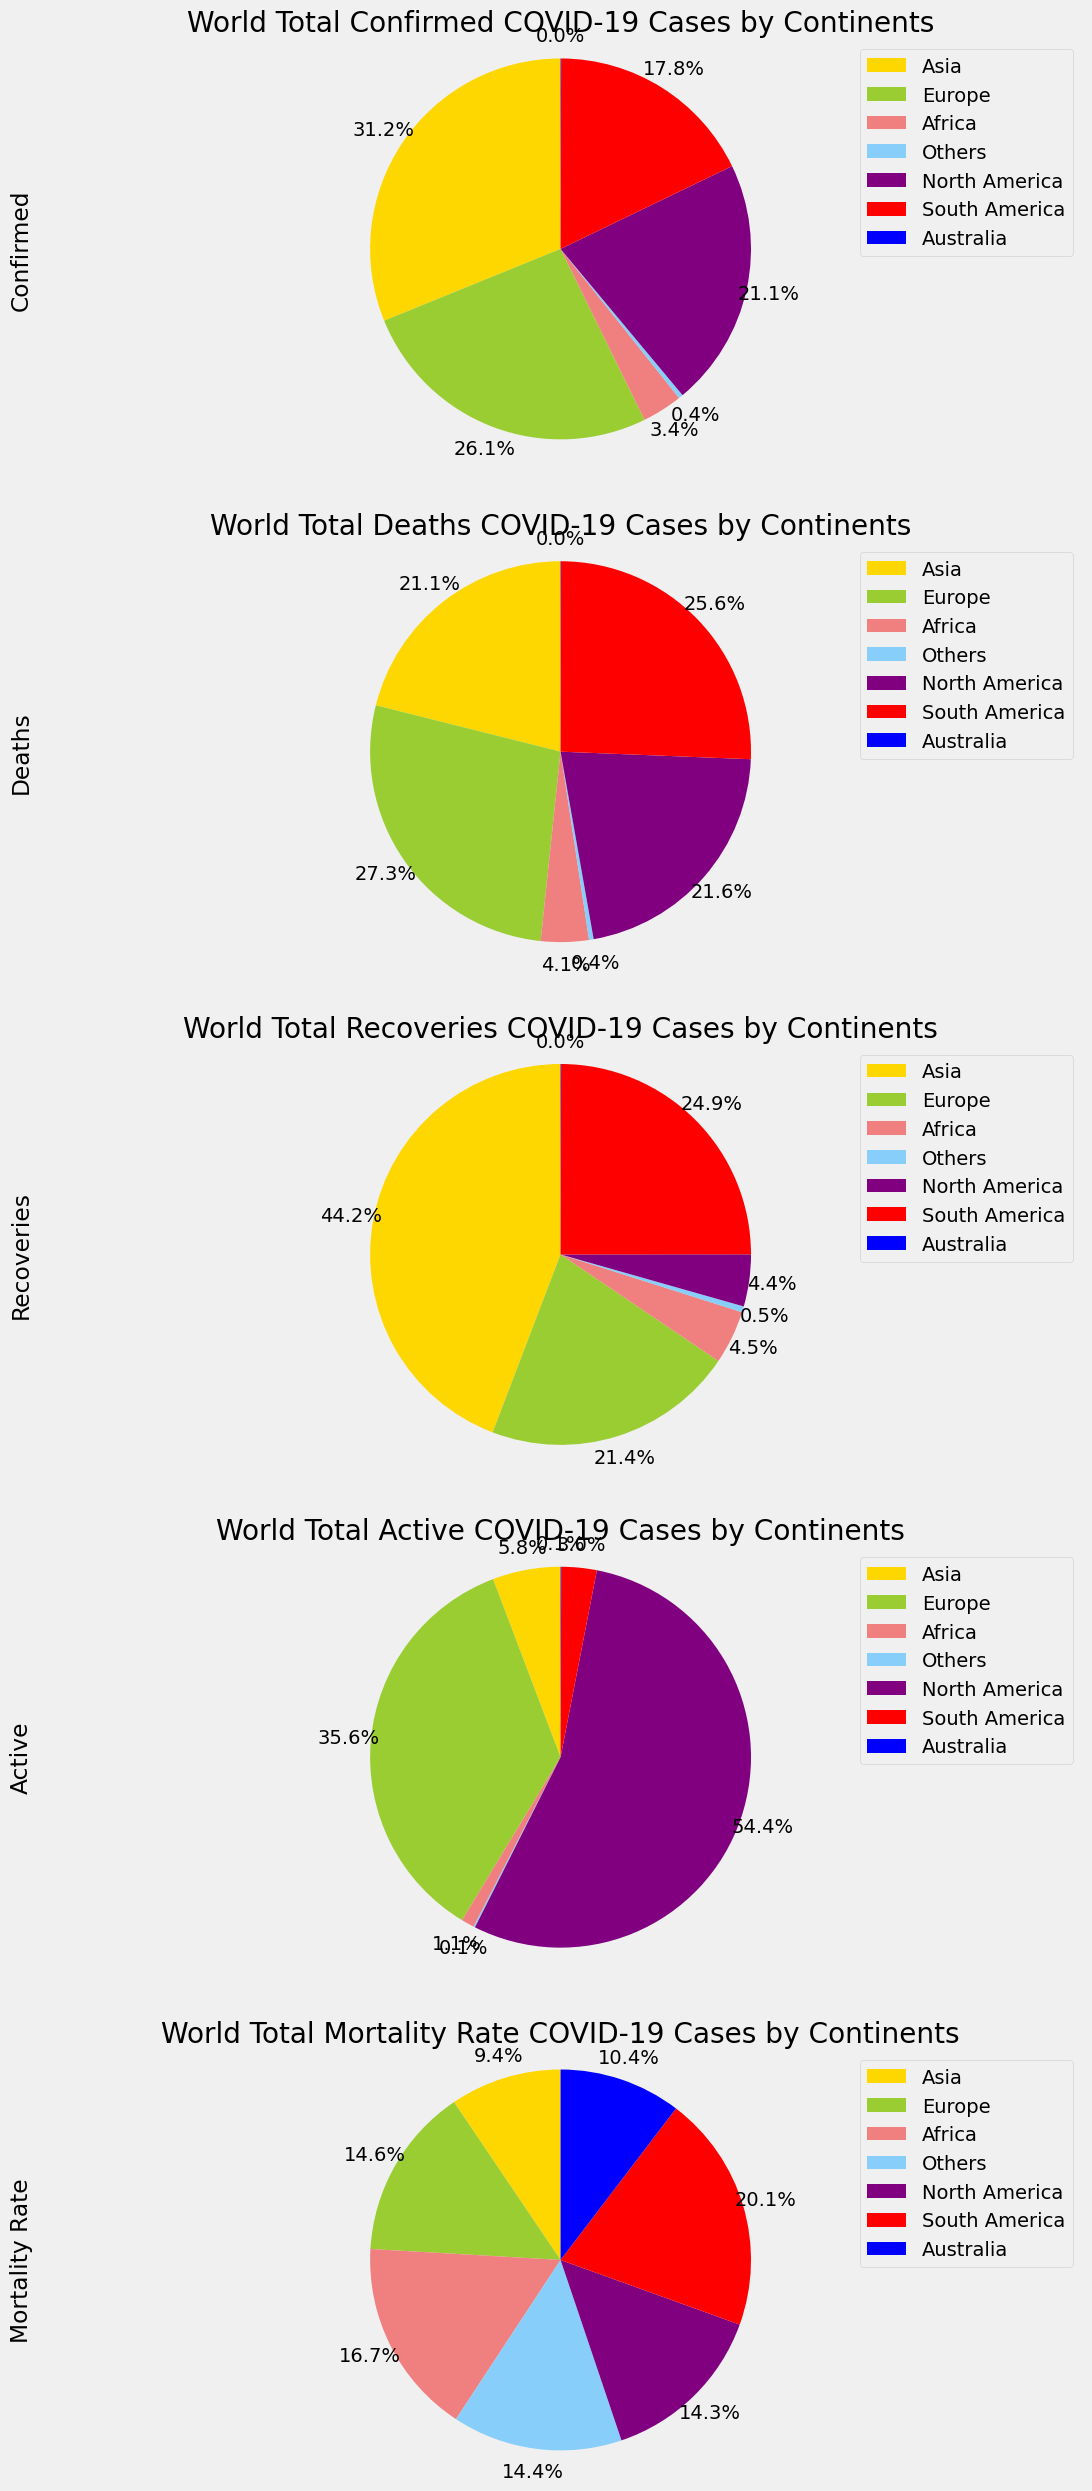

In [43]:
# Use Matplotlib
plt.figure(figsize=(12, 30))

# set color consistent for each continent
colors_list = [
    "gold",
    "yellowgreen",
    "lightcoral",
    "lightskyblue",
    "purple",
    "red",
    "blue",
]


for i, cont in enumerate(continental_df.columns.values):
    plt.subplot(5, 1, i + 1)
    continental_df[cont].plot(
        kind="pie",
        # figsize=(12, 30), => comment this because it makes more sense to define the size up top
        autopct="%1.1f%%",
        startangle=90,
        shadow=False,
        labels=None,
        pctdistance=1.12,
        colors=colors_list,
    )

    plt.title("World Total " + cont + " COVID-19 Cases by Continents")

    # make pie round
    plt.axis("equal")

    # add legend
    plt.legend(labels=continental_df.index, loc="upper right")

plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [44]:
# Take average coordinate
col_keep = ["Country/Region", "Lat", "Long"]
col_del = set(confirmed_df.columns.values) - set(col_keep)

a = confirmed_df.drop(columns=col_del).groupby("Country/Region").mean()

# Add longtitude and latitude to country_df
country_df["Lat"] = a["Lat"]
country_df["Long"] = a["Long"]

In [45]:
# viewing the world map
map = folium.Map(location=(0, 0), zoom_start=2)


# Add circle which responding to each map
for i in np.arange(0, len(country_df), 1):
    # Pop up annotation
    popup_html = folium.Popup(
        """
        <h3>{}</h3>
        <ul>
            <li>Confirm: {} </li>
            <li>Deaths: {} </li>
            <li>Recoveries: {} </li>
            <li>Mortality Rate: {}</li>
        </ul>
        """.format(
            country_df.index.values[i],
            country_df["Confirmed"].values[i],
            country_df["Deaths"].values[i],
            country_df["Recoveries"].values[i],
            country_df["Mortality Rate"].values[i],
        ),
        parse_html=False,
    )
    folium.Circle(
        radius=int(country_df.iloc[i]["Confirmed"]) / 40,
        location=country_df.iloc[i][["Lat", "Long"]].to_list(),
        fill=True,
        color="orange",
        popup=popup_html,
    ).add_to(map)

map

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [46]:
# Calculate log(10) Active
# note that 0 doesn't have a log10, thus we need to drop it first
# note that active < 0 doesn't make any sense, it is safe to say that the
# active number is not reliable, let's replace it as well (might be due to the incorrect of either Confirmed, Deaths, or Recoveires)
cached = country_df.replace(0, np.nan).dropna()
cached = cached.drop(index=cached.loc[country_df["Active"] < 0].index)
log_10_active = pd.DataFrame(np.log10(cached["Active"]))

# Put Lat and Long back
for i in ["Lat", "Long"]:
    log_10_active[i] = country_df[i]
log_10_active.reset_index(inplace=True)

# Filter -inf, inf and nan
# Replace inf with nan
log_10_active.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop NaN
log_10_active.dropna(inplace=True)

# Draw plotly
fig = px.scatter_geo(
    log_10_active,
    title="Log 10 Active Cases by Countries",
    lat="Lat",
    lon="Long",
    hover_name="Country/Region",
    color="Active",
    color_continuous_scale="Spectral",
    size="Active",
    projection="natural earth",
)

fig.update_coloraxes(colorbar_title="Active Case Spectral")

fig.show()

# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [47]:
country_df.sort_values(by="Confirmed", ascending=False).head(10)

continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                           
USA             North America   35460776  611222           0  34849554   
India                    Asia   31812114  426290    30974748    411076   
Brazil          South America   20034407  559944    17771228   1703235   
Russia                 Europe    6274006  159032     5609682    505292   
France                 Europe    6272466  112245      415111   5745110   
United Kingdom         Europe    5980830  157209       24693   5798928   
Turkey                   Asia    5822487   51767     5478185    292535   
Argentina       South America    4975616  106747     4615834    253035   
Colombia        South America    4815063  121695     4615354     78014   
Spain                  Europe    4545184   81844      150376   4312964   

                Mortality Rate        Lat        Long  
Country/Region                                         
USA                       1.72  40.000000 -100.000000  
India                     1.34  20.593684   78.962880  
Brazil                    2.79 -14.235000  -51.925300  
Russia                    2.53  61.524010  105.318756  
France                    1.79   6.425300   -9.839634  
United Kingdom            2.63  22.424560  -42.022004  
Turkey                    0.89  38.963700   35.243300  
Argentina                 2.15 -38.416100  -63.616700  
Colombia                  2.53   4.570900  -74.297300  
Spain                     1.80  40.463667   -3.749220

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

<Figure size 1200x1000 with 0 Axes>

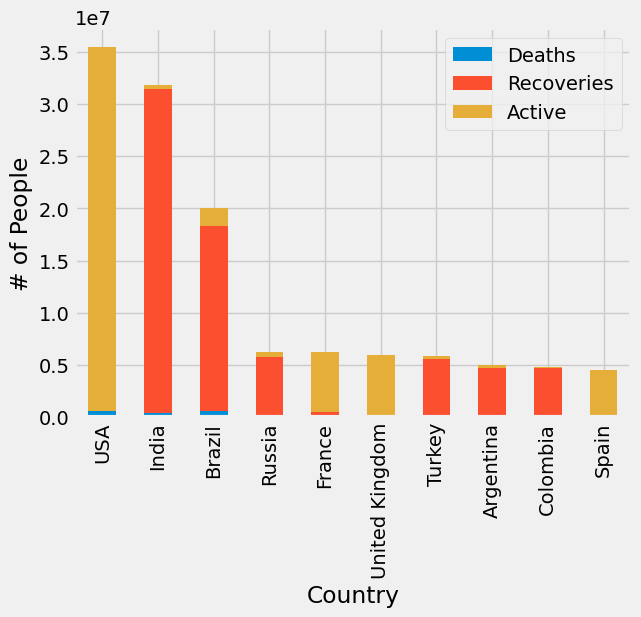

In [48]:
top_ten_countries = country_df.sort_values(
    by="Confirmed", ascending=False
).head(10)

# stacked columns should be made from Deaths, Recoveries, and Active (and the sum which is Confirmed)
plt.figure(figsize=(12, 10))

# Loop for draw Deaths, Recoveries, and Active
types_ = ["Deaths", "Recoveries", "Active"]
top_ten_countries[types_].plot(
    kind="bar", stacked=True, xlabel="Country", ylabel="# of People"
)

# Customization
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.legend()

plt.show()

The reason why USA, United Kingdom, Spain does not have any recoveries is because some area doesn't report it,
thus they record it as zero. We can see USA recorded recoveries at first, but then they change to not include
the recovery rate anymore


Source: https://covidtracking.com/about-data/faq#why-have-you-stopped-reporting-national-recoveries 

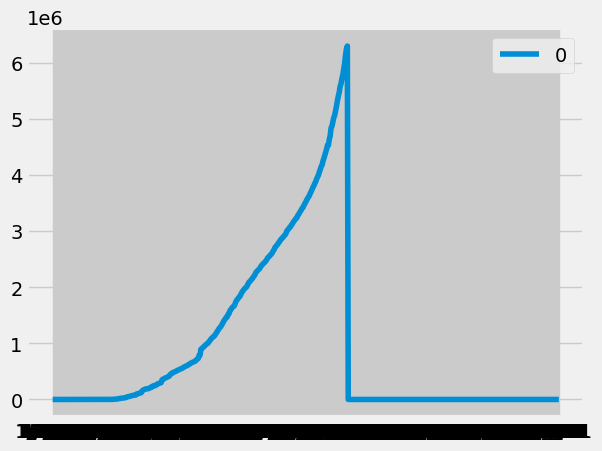

In [49]:
sns.lineplot(
    recoveries_df.loc[recoveries_df["Country/Region"] == "USA"]
    .reset_index()
    .drop(columns="index")
    .select_dtypes(include="int64")
    .transpose()
)
# plt.xticks(np.arange(1, len(recoveries_df), 5))

plt.show()

# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

Để có thể đánh giá được dịch Covid trên thế giới đã đạt đỉnh chưa (tính đến 8/4/21) thì chúng ta sẽ phải vẽ biểu đồ line plot World wide hàng ngày

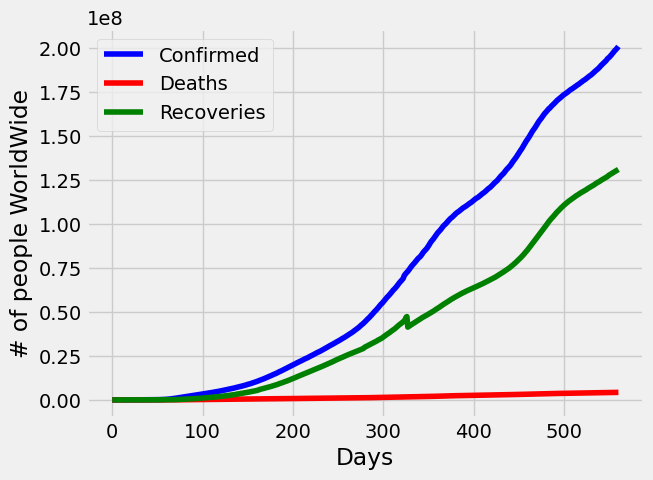

In [50]:
color_ = ["blue", "red", "green"]
name_ = ["Confirmed", "Deaths", "Recoveries"]
for i, type_ in enumerate([confirmed_df, deaths_df, recoveries_df]):
    sns.lineplot(
        data=type_.select_dtypes("int64")
        .sum()
        .reset_index()
        .drop(columns="index")
        .rename(columns={0: name_[i]}),
        palette=[color_[i]],
    )

plt.xlabel("Days")
plt.ylabel("# of people WorldWide")

plt.show()

Như vậy, chúng ta có thể thấy rằng tính đến 8/4/2021, dịch Covid chưa hề đạt đỉnh vì số ca nhiễm chưa hề có dấu hiệu suy giảm

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó). 
Đặt câu trả lời của bạn ở đây:

19.1. Answer: Châu lục có tỷ lệ tử vong cao nhất là South America, với 3.07% tử vong

19.2. Answer: Châu lục có tỷ lệ lây lan cao nhất là châu Á, với 62,536,726 ca dương tính

19.3. Answer: Châu lục có tỷ lệ khỏi bệnh cao nhất là châu Á, với 57,853,343 ca khỏi bệnh

In [51]:
# continental_df.idxmax().loc["Confirmed"]
result = pd.DataFrame(columns=["Question", "Answer", "Number"]).set_index(
    "Question"
)

# Using loc to assign values directly
for i, type_ in enumerate(["Mortality Rate", "Confirmed", "Recoveries"]):
    result.loc["19." + str(i + 1)] = [
        continental_df.idxmax().loc[type_],
        continental_df.loc[continental_df.idxmax().loc[type_], type_],
    ]
result

Answer       Number
Question                            
19.1      South America         3.07
19.2               Asia  62536726.00
19.3               Asia  57853343.00

Đối với bài tập này, chúng ta cần phải sử dụng folium để vẽ dữ liệu từng lục địa một để có thể trả lời. Câu trả lời ở trên, còn đồ thị folium sẽ nằm ở dưới

In [52]:
# add continent to confirm_df
confirmed_df["continent"] = confirmed_df["Country/Region"].apply(
    func=country_to_continent
)

# Take average coordinate
col_keep = ["continent", "Lat", "Long"]
col_del = set(confirmed_df.columns.values) - set(col_keep)

coor_ = confirmed_df.drop(columns=col_del).groupby("continent").mean()

# Simple fix for some coordinate
coor_.loc["North America"] = confirmed_df.set_index("Country/Region").loc[
    "USA", ["Lat", "Long"]
]
coor_.loc["Europe"] = confirmed_df.set_index("Country/Region").loc[
    "Germany", ["Lat", "Long"]
]

# Add longtitude and latitude to continental_df
for i, col_ in enumerate(coor_.columns):
    continental_df[col_] = coor_[col_]

continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate  \
continent                                                                 
Asia            62536726   902952    57853343   3780431            1.44   
Europe          52448545  1167140    27947075  23334330            2.23   
Africa           6855602   174000     5955131    726471            2.54   
Others            753558    16614      654615     82329            2.20   
North America   42351963   924518     5776939  35650506            2.18   
South America   35722194  1096367    32656668   1969159            3.07   
Australia          90000     1425       55290     33285            1.58   

                     Lat        Long  
continent                             
Asia           29.138352   90.343886  
Europe         51.165691   10.451526  
Africa          2.770454   17.343638  
Others         15.767547   63.391938  
North America  40.000000 -100.000000  
South America -12.652374  -64.493907  
Australia     -17.867882   83.047076

In [53]:
# viewing the world map
map = folium.Map(location=(0, 0), zoom_start=2)


# Add circle which responding to each map
for i in np.arange(0, len(continental_df), 1):
    # Pop up annotation
    popup_html = folium.Popup(
        """
        <h3>{}</h3>
        <ul>
            <li>Confirm: {} </li>
            <li>Deaths: {} </li>
            <li>Recoveries: {} </li>
            <li>Mortality Rate: {}</li>
        </ul>
        """.format(
            continental_df.index.values[i],
            continental_df["Confirmed"].values[i],
            continental_df["Deaths"].values[i],
            continental_df["Recoveries"].values[i],
            continental_df["Mortality Rate"].values[i],
        ),
        parse_html=False,
    )

    folium.Circle(
        radius=int(continental_df.iloc[i]["Recoveries"]) / 40,
        location=continental_df.iloc[i][["Lat", "Long"]].to_list(),
        fill=True,
        color="green",
    ).add_to(map)

    folium.Circle(
        radius=int(continental_df.iloc[i]["Mortality Rate"]) * 10**5,
        location=continental_df.iloc[i][["Lat", "Long"]].to_list(),
        fill=True,
        color="red",
    ).add_to(map)

    folium.Circle(
        radius=int(continental_df.iloc[i]["Confirmed"]) / 40,
        location=continental_df.iloc[i][["Lat", "Long"]].to_list(),
        fill=True,
        color="blue",
        popup=popup_html,
    ).add_to(map)

map

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

20.1. Vanuatu với tỷ lệ tử vong 25%

20.2. USA với số lượng ca nhiễm 35460776.0 ca

20.3. India với số lượng ca khỏi bệnh 30974748.0 ca

In [58]:
result = pd.DataFrame(columns=["Question", "Answer", "Number"]).set_index(
    "Question"
)

# Using loc to assign values directly
for i, type_ in enumerate(["Mortality Rate", "Confirmed", "Recoveries"]):
    result.loc["20." + str(i + 1)] = [
        country_df.select_dtypes(include=["int64", "float64"])
        .idxmax()
        .loc[type_],
        country_df.loc[
            country_df.select_dtypes(include=["int64", "float64"])
            .idxmax()
            .loc[type_],
            type_,
        ],
    ]
result

Answer      Number
Question                     
20.1      Vanuatu        25.0
20.2          USA  35460776.0
20.3        India  30974748.0

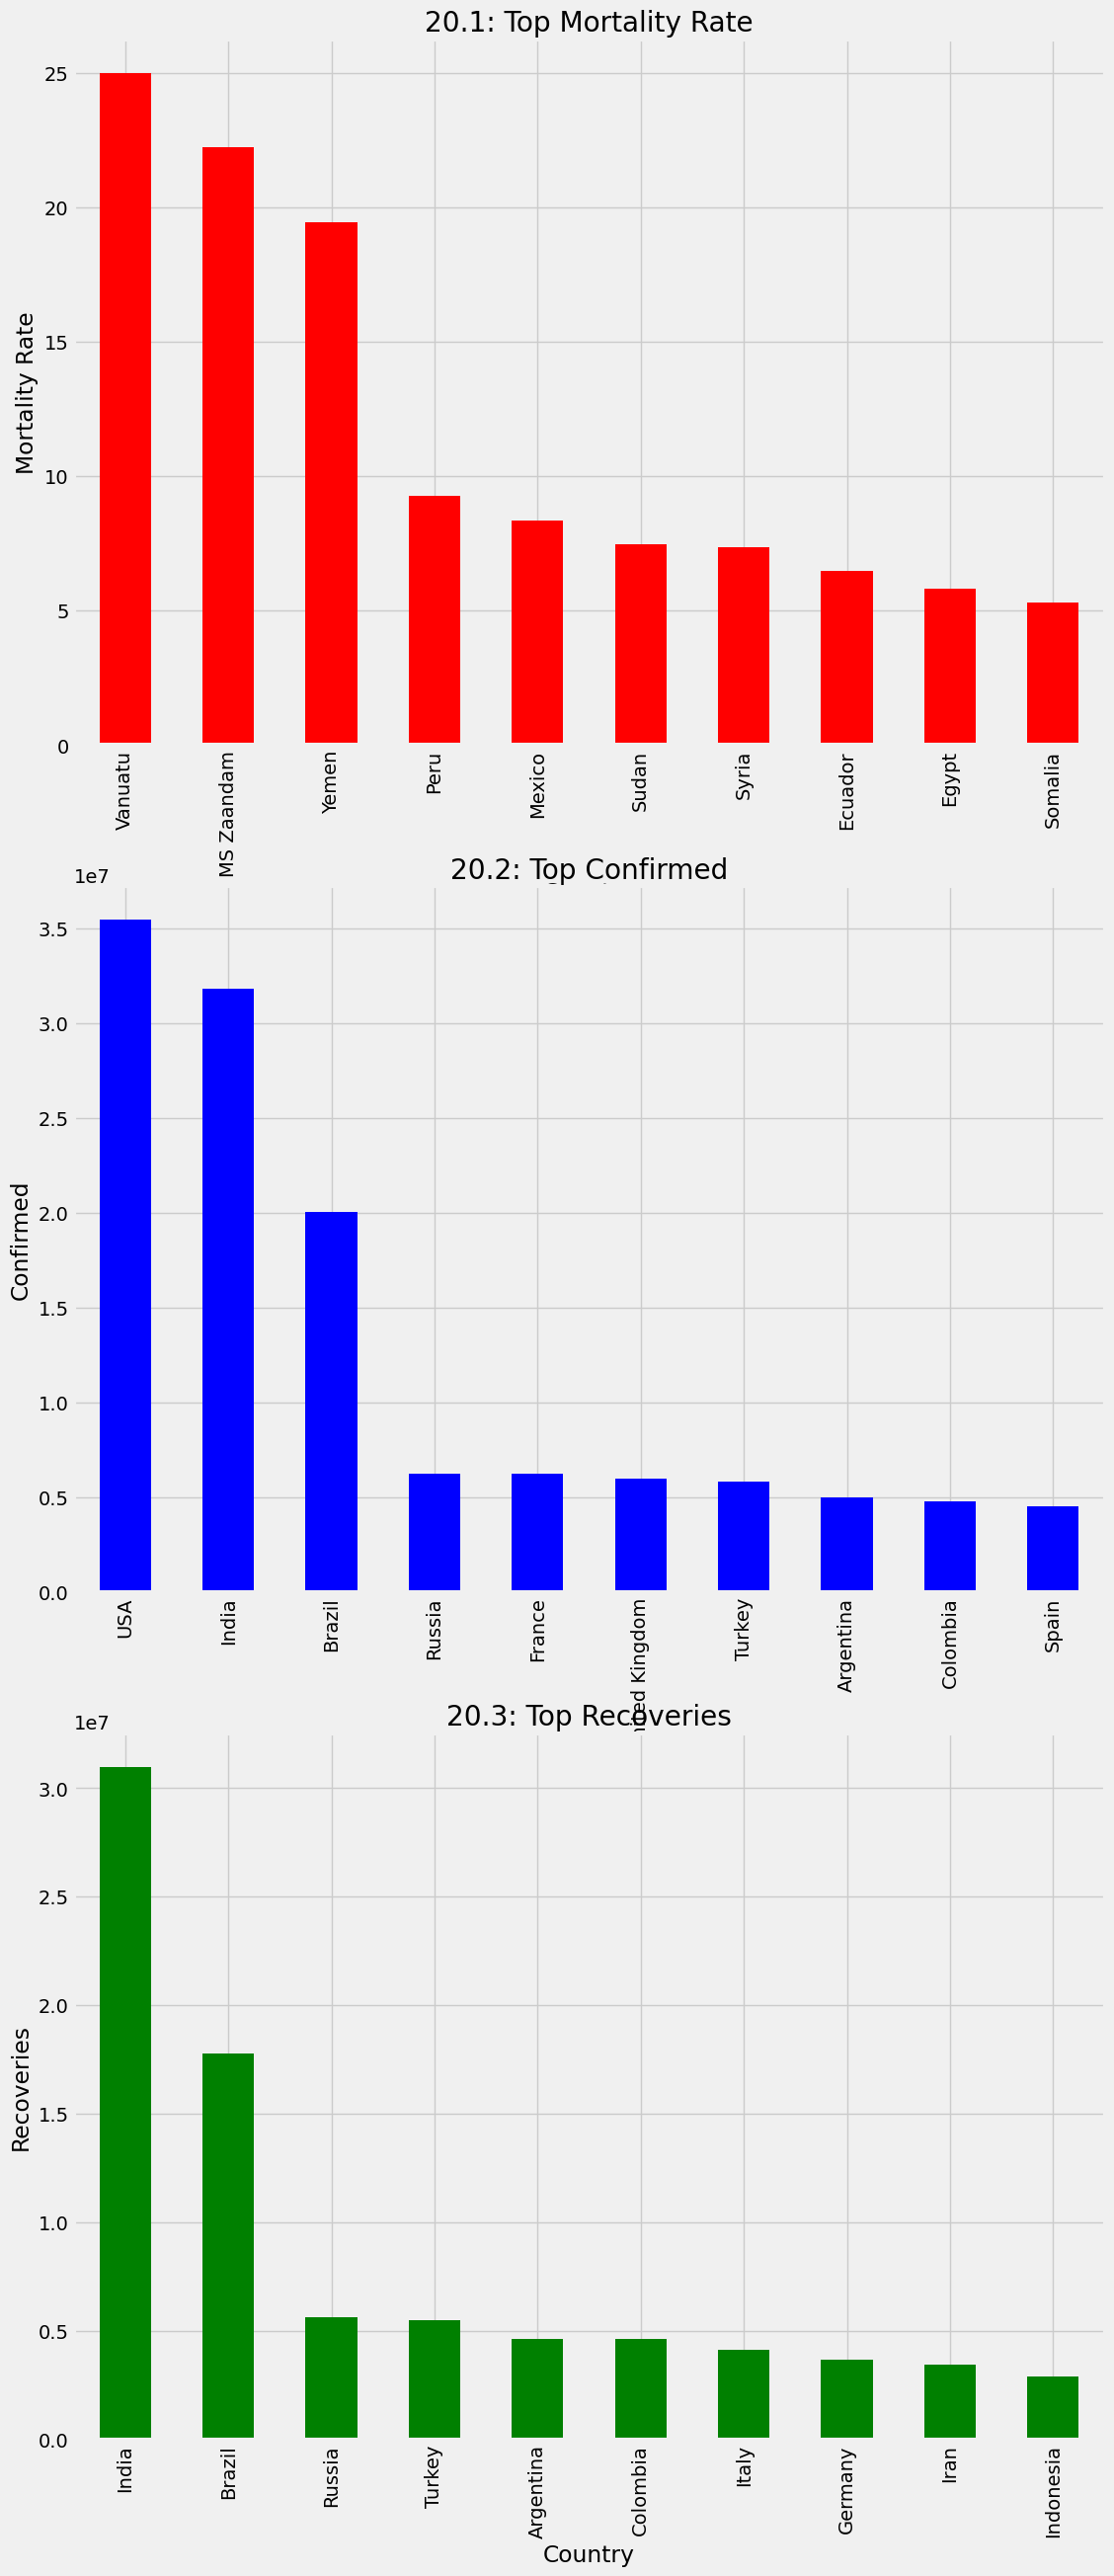

In [60]:
# Let's draw some barplot to prove our answer - Let's draw top 10 countries for each question
plt.figure(figsize=(12, 30))
color_ = ["red", "blue", "green"]

for i, type_ in enumerate(["Mortality Rate", "Confirmed", "Recoveries"]):
    plt.subplot(3, 1, i + 1)
    country_df[type_].sort_values(ascending=False).head(10).plot(
        kind="bar",
        xlabel="Country",
        ylabel=type_,
        color=color_[i],
        title="20.{}: Top {}".format(str(i + 1), type_),
    )

plt.show()

# Bài toán 21
**Tập dữ liệu USA**

In [61]:
us_medical_data = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv"
)

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

21.1. Connecticut với 9.23% tử vong
21.2. New York với 397649 ca nhiễm
21.3. Texas với 103782 ca khỏi bệnh

In [66]:
us_medical_data_df = us_medical_data.set_index("Province_State")[
    ["Confirmed", "Deaths", "Recovered", "Active"]
]

us_medical_data_df["Mortality Rate"] = (
    us_medical_data_df["Deaths"] / us_medical_data_df["Confirmed"]
) * 100

In [67]:
result = pd.DataFrame(columns=["Question", "Answer", "Number"]).set_index(
    "Question"
)

# Using loc to assign values directly
for i, type_ in enumerate(["Mortality Rate", "Confirmed", "Recovered"]):
    result.loc["21." + str(i + 1)] = [
        us_medical_data_df.select_dtypes(include=["int64", "float64"])
        .idxmax()
        .loc[type_],
        us_medical_data_df.loc[
            us_medical_data_df.select_dtypes(include=["int64", "float64"])
            .idxmax()
            .loc[type_],
            type_,
        ],
    ]
result

Answer         Number
Question                            
21.1      Connecticut       9.234503
21.2         New York  397649.000000
21.3            Texas  103782.000000

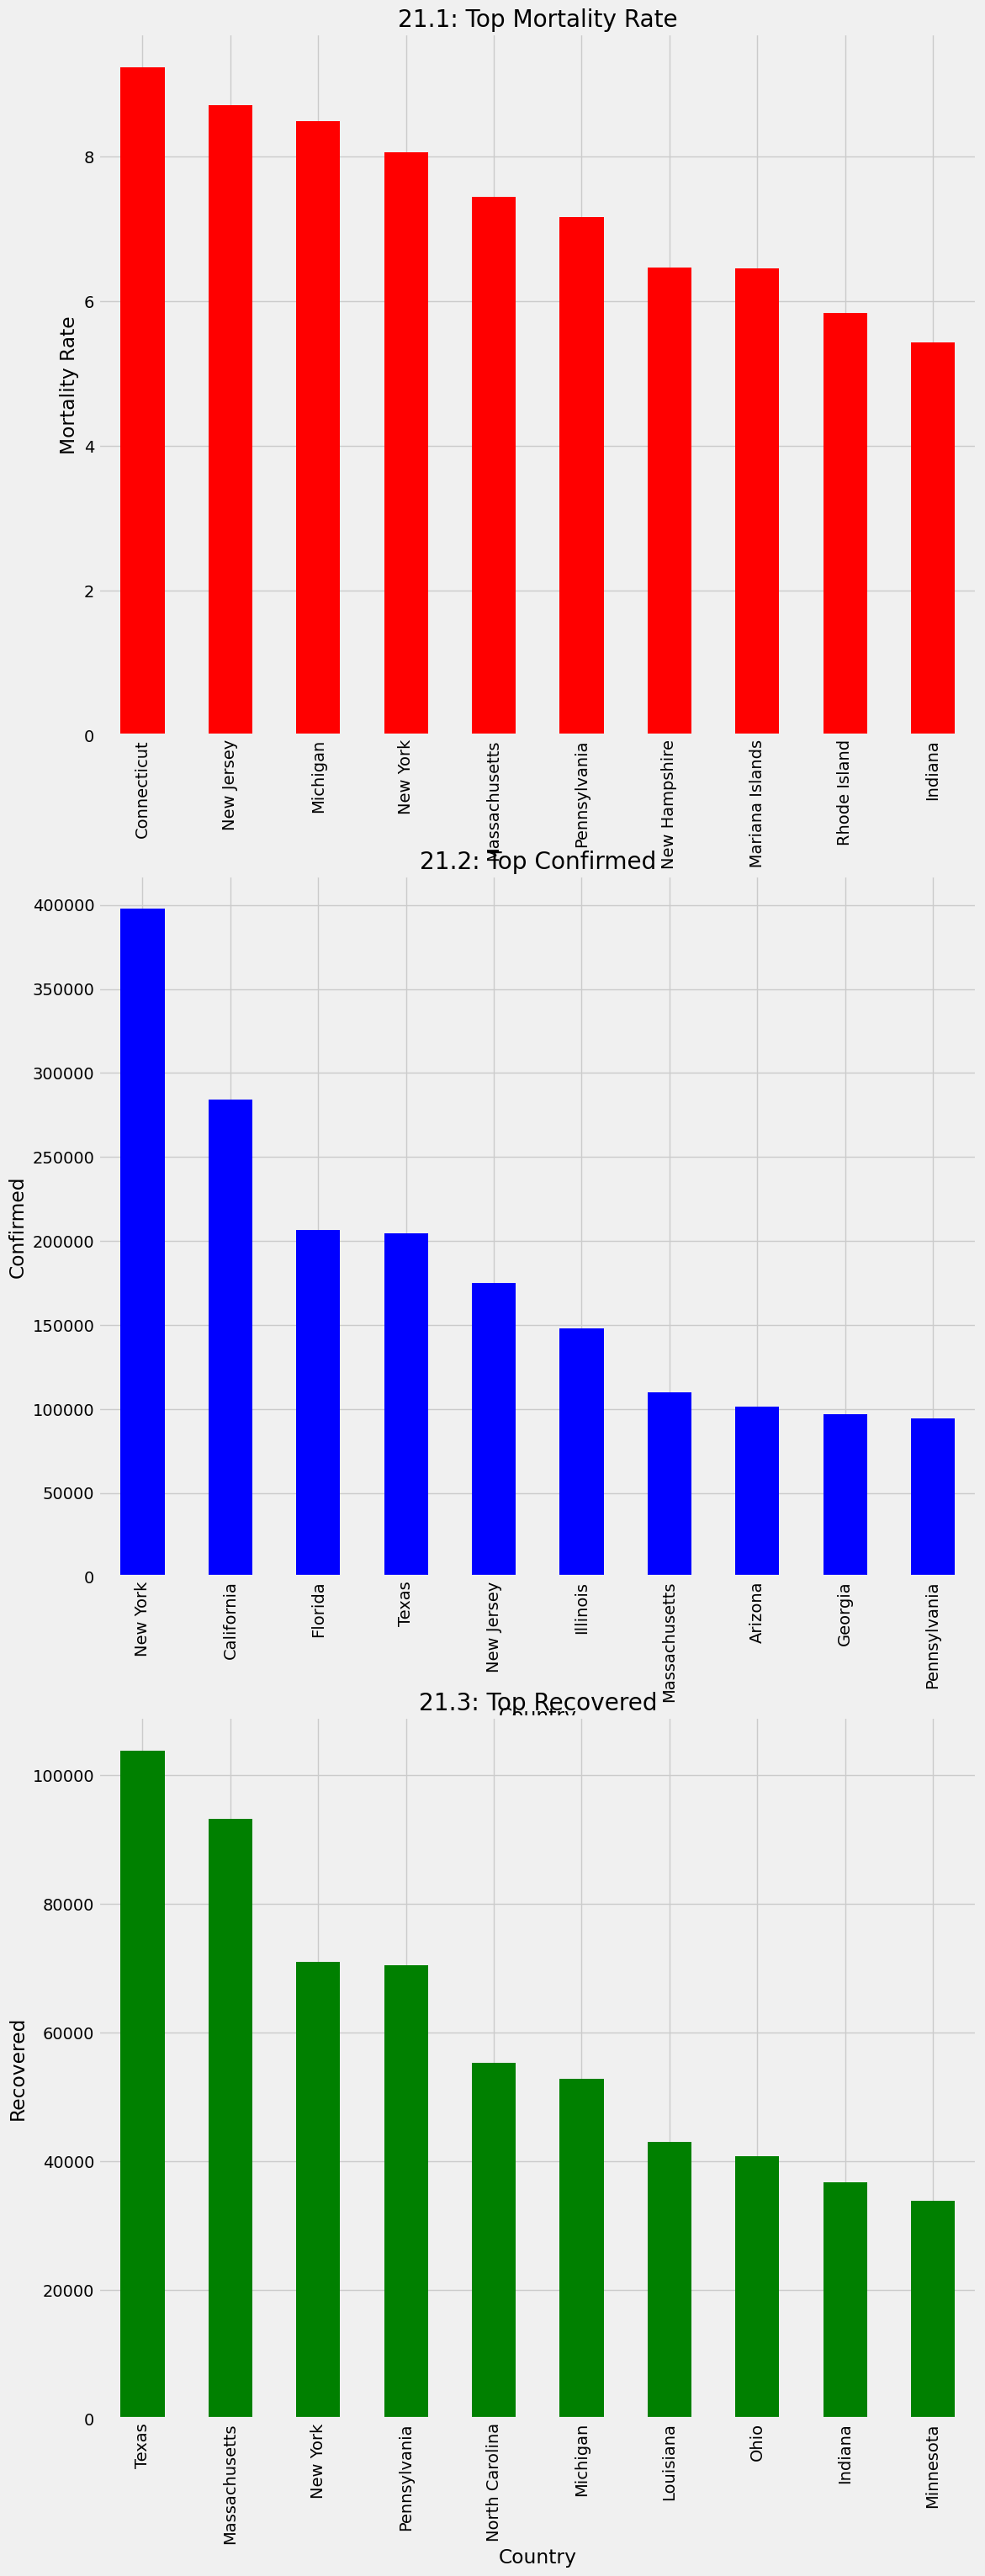

In [68]:
# plot for visualization
# Let's draw some barplot to prove our answer - Let's draw top 10 countries for each question
plt.figure(figsize=(12, 35))
color_ = ["red", "blue", "green"]

for i, type_ in enumerate(["Mortality Rate", "Confirmed", "Recovered"]):
    plt.subplot(3, 1, i + 1)
    us_medical_data_df[type_].sort_values(ascending=False).head(10).plot(
        kind="bar",
        xlabel="Country",
        ylabel=type_,
        color=color_[i],
        title="21.{}: Top {}".format(str(i + 1), type_),
    )

plt.show()

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# drop na first
us_medical_data_for_linear = us_medical_data.dropna(
    subset=["People_Tested", "Confirmed"]
)

# train test split
testing_state = set(["New York", "Florida", "Texas", "California"])
training_state = (
    set(us_medical_data_for_linear["Province_State"].values) - testing_state
)

us_medical_data_for_linear = us_medical_data_for_linear.set_index(
    "Province_State"
)
us_medical_data_for_linear.head()

Country_Region          Last_Update      Lat     Long_  \
Province_State                                                          
Alabama                    US  2020-07-07 04:34:13  32.3182  -86.9023   
Alaska                     US  2020-07-07 04:34:13  61.3707 -152.4044   
American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
Arizona                    US  2020-07-07 04:34:13  33.7298 -111.4312   
Arkansas                   US  2020-07-07 04:34:13  34.9697  -92.3731   

                Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  \
Province_State                                                               
Alabama             44932    1007    22082.0  21843.0     1     916.383942   
Alaska               1184      16      548.0    620.0     2     161.849237   
American Samoa          0       0        NaN      NaN    60       0.000000   
Arizona            101455    1829    11836.0  87790.0     4    1393.858286   
Arkansas            24253     292    17834.0   6127.0     5     803.663856   

                Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio  \
Province_State                                                                 
Alabama                        NaN               2914.0                  NaN   
Alaska                         NaN                  NaN                  NaN   
American Samoa                 NaN                  NaN                  NaN   
Arizona                        NaN               5188.0                  NaN   
Arkansas                       NaN               1575.0                  NaN   

                       UID ISO3  Testing_Rate  Hospitalization_Rate  \
Province_State                                                        
Alabama         84000001.0  USA           NaN              6.493159   
Alaska          84000002.0  USA  16916.662680                   NaN   
American Samoa        16.0  ASM   1250.876152                   NaN   
Arizona         84000004.0  USA   8488.322873              5.113597   
Arkansas        84000005.0  USA  11431.093603              6.494042   

                      Date  People_Tested  Mortality_Rate  
Province_State                                             
Alabama         2020-07-06       663719.0        2.241164  
Alaska          2020-07-06       123753.0        1.351351  
American Samoa  2020-07-06          696.0             NaN  
Arizona         2020-07-06       873294.0        1.802770  
Arkansas        2020-07-06       344968.0        1.203975

Đây là lời giải của đề bài bên trên. Lời giải của đề bài trong yeu cầu chấm điểm của Funix sẽ được trình bày ở dưới

Coefficient: [[0.06123867]]
Intercept: [-557.53170337]


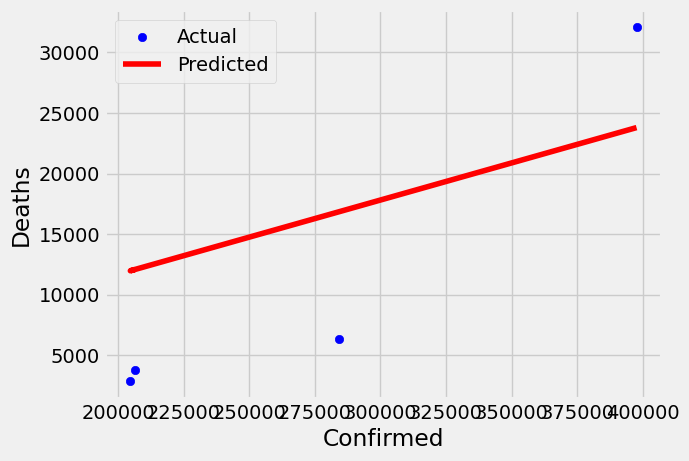

In [71]:
# Training set - note that X is Confirm, y is Deaths (y is the one we are trying to predict)
# Reshape(-1,1) is to convert 1D array to 2D for Machine Learning, especially scikit-learn
X_train = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(training_state)]
).reshape(-1, 1)
y_train = np.array(
    us_medical_data_for_linear["Deaths"].loc[list(training_state)]
).reshape(-1, 1)

# Testing set
X_test = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(testing_state)]
).reshape(-1, 1)
y_test = np.array(
    us_medical_data_for_linear["Deaths"].loc[list(testing_state)]
).reshape(-1, 1)


# Create model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# specs output
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
# plt.scatter(X_train, y_train, color="green", label="Training set")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.legend()
plt.show()

Trong trường hợp sử dụng People Tested để dự báo Confirm với 10 bang có số trường hợp được xác nhận cao nhất

In [72]:
# Train test split
testing_state = set(
    us_medical_data.sort_values(by="Confirmed", ascending=False)[
        "Province_State"
    ]
    .head(10)
    .to_list()
)
training_state = (
    set(
        us_medical_data.dropna(subset=["People_Tested", "Confirmed"])[
            "Province_State"
        ]
    )
    - testing_state
)

In [73]:
# Training set - note that X is Confirm, y is Deaths (y is the one we are trying to predict)
# Reshape(-1,1) is to convert 1D array to 2D for Machine Learning, especially scikit-learn
X_train = np.array(
    us_medical_data_for_linear["People_Tested"].loc[list(training_state)]
).reshape(-1, 1)
y_train = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(training_state)]
).reshape(-1, 1)

# Testing set
X_test = np.array(
    us_medical_data_for_linear["People_Tested"].loc[list(testing_state)]
).reshape(-1, 1)
y_test = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(testing_state)]
).reshape(-1, 1)

# Create model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# specs output
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [[0.0719761]]
Intercept: [-1017.76296478]


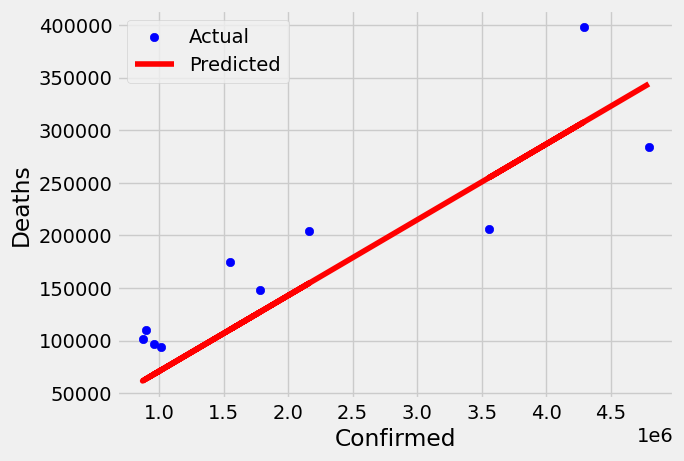

In [74]:
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.legend()
plt.show()